#Importing all necessary libraries

In [262]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
!pip install eli5
import eli5
import numpy as np
from eli5.sklearn import PermutationImportance
from scipy import stats
import copy

# Importing the datasets from google drive

In [263]:
merged_data=pd.read_excel('/content/drive/MyDrive/DAL dataset/merged_data.xlsx')

#Obtaining the columns and information for the dataset

In [264]:
merged_data.columns

Index(['Unnamed: 0', 'State', 'AreaName', 'All_Poverty', 'M_Poverty',
       'F_Poverty', 'FIPS', 'Med_Income', 'Med_Income_White',
       'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic',
       'M_With', 'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without',
       'fips_x', 'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend',
       'fips_y', 'Mortality_Rate', 'Avg_Ann_Deaths'],
      dtype='object')

##Overall information

In [265]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3134 non-null   int64  
 1   State              3134 non-null   object 
 2   AreaName           3134 non-null   object 
 3   All_Poverty        3134 non-null   int64  
 4   M_Poverty          3134 non-null   int64  
 5   F_Poverty          3134 non-null   int64  
 6   FIPS               3134 non-null   int64  
 7   Med_Income         3133 non-null   float64
 8   Med_Income_White   3132 non-null   float64
 9   Med_Income_Black   1924 non-null   float64
 10  Med_Income_Nat_Am  1474 non-null   float64
 11  Med_Income_Asian   1377 non-null   float64
 12  Hispanic           2453 non-null   float64
 13  M_With             3134 non-null   int64  
 14  M_Without          3134 non-null   int64  
 15  F_With             3134 non-null   int64  
 16  F_Without          3134 

## Studying and preprocessing the merged_dataset

In [266]:
merged_data

,Unnamed: 0,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,...,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
0,0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,...,540,1442,1857,2013,*,3 or fewer,*,2013,*,*
1,1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,...,564,4177,1333,2016,*,3 or fewer,*,2016,*,*
2,2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,...,21393,243173,44638,2020,61.5,131,stable,2020,47.3,96
3,3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,...,1774,13023,4482,2050,62.7,6,stable,2050,58.3,5
4,4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,NaN,...,67,768,191,2060,*,3 or fewer,*,2060,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,3129,WY,"Sweetwater County, Wyoming",5058,2177,2881,56037,69022.0,69333.0,23535.0,...,2683,38491,6001,56037,39.9,14,stable,56037,28.4,9
3130,3130,WY,"Teton County, Wyoming",1638,1026,612,56039,75325.0,77651.0,NaN,...,1192,18503,3750,56039,23.7,5,stable,56039,29.1,5
3131,3131,WY,"Uinta County, Wyoming",2845,1453,1392,56041,56569.0,56532.0,NaN,...,1503,17843,2916,56041,31.7,6,stable,56041,22.1,4
3132,3132,WY,"Washakie County, Wyoming",1137,489,648,56043,47652.0,48110.0,NaN,...,703,6839,1394,56043,50,6,stable,56043,38.2,5


In [267]:
# columns Med_Income, Med_Income_White, Med_Income_Black, Med_Income_Nat_Am, Med_Income_Asian, Hispanic NAN values will be replaced by the mean of the respective columns
merged_data['Med_Income'].fillna(merged_data['Med_Income'].mean(),inplace=True)
merged_data['Med_Income_White'].fillna(merged_data['Med_Income_White'].mean(),inplace=True)
merged_data['Med_Income_Black'].fillna(merged_data['Med_Income_Black'].mean(),inplace=True)
merged_data['Med_Income_Nat_Am'].fillna(merged_data['Med_Income_Nat_Am'].mean(),inplace=True)
merged_data['Med_Income_Asian'].fillna(merged_data['Med_Income_Asian'].mean(),inplace=True)
merged_data['Hispanic'].fillna(merged_data['Hispanic'].mean(),inplace=True)

In [268]:
merged_data.info()#Updated information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3134 non-null   int64  
 1   State              3134 non-null   object 
 2   AreaName           3134 non-null   object 
 3   All_Poverty        3134 non-null   int64  
 4   M_Poverty          3134 non-null   int64  
 5   F_Poverty          3134 non-null   int64  
 6   FIPS               3134 non-null   int64  
 7   Med_Income         3134 non-null   float64
 8   Med_Income_White   3134 non-null   float64
 9   Med_Income_Black   3134 non-null   float64
 10  Med_Income_Nat_Am  3134 non-null   float64
 11  Med_Income_Asian   3134 non-null   float64
 12  Hispanic           3134 non-null   float64
 13  M_With             3134 non-null   int64  
 14  M_Without          3134 non-null   int64  
 15  F_With             3134 non-null   int64  
 16  F_Without          3134 

## After thoroughly going through the data we saw states 'MN' , 'KS', 'NV' have '_' and '__' for all incidence rate and Avg_Ann_Incidence values. so we will drop this row because no information is available

In [269]:
# After thoroughly going through the data we saw states 'MN' , 'KS', 'NV' have '_' and '__' for all incidence rate and Avg_Ann_Incidence values. so we will drop this row because no information is available
KS_state=merged_data[merged_data['State']=='KS']
MN_state=merged_data[merged_data['State']=='MN']
NV_state=merged_data[merged_data['State']=='NV']
merged_data.drop(merged_data[merged_data['State']=='KS'].index,axis=0,inplace=True)
merged_data.drop(merged_data[merged_data['State']=='MN'].index,axis=0,inplace=True)
merged_data.drop(merged_data[merged_data['State']=='NV'].index,axis=0,inplace=True)

In [270]:
#Replace all 3 or less values with 3 in Avg_Ann_incidence column
merged_data['Avg_Ann_Incidence'].replace('3 or fewer',3,inplace=True)

In [271]:
#MI state contains # appended to the number end on Incidence_Rate column
merged_data[merged_data['State']=='MI']

,Unnamed: 0,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,...,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
1225,1225,MI,"Alcona County, Michigan",1575,709,866,26001,38033.0,38313.0,34750.214137,...,531,9355,1099,26001,66.2 #,15,stable,26001,68.2,17
1226,1226,MI,"Alger County, Michigan",1213,635,578,26003,39300.0,38853.0,34750.214137,...,429,7480,1019,26003,48.6 #,8,stable,26003,48.4,8
1227,1227,MI,"Allegan County, Michigan",14185,6447,7738,26005,54264.0,54439.0,42047.000000,...,4477,102352,9766,26005,53.7 #,70,stable,26005,46.6,59
1228,1228,MI,"Alpena County, Michigan",4898,2193,2705,26007,38829.0,38966.0,29375.000000,...,1605,25278,3425,26007,77.1 #,35,falling,26007,54.3,25
1229,1229,MI,"Antrim County, Michigan",3316,1451,1865,26009,46845.0,47290.0,34750.214137,...,1232,20499,2602,26009,59.1 #,24,stable,26009,47,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,1303,MI,"Tuscola County, Michigan",8317,3963,4354,26157,43768.0,43816.0,24688.000000,...,2326,48130,5372,26157,73.5 #,55,stable,26157,52.8,39
1304,1304,MI,"Van Buren County, Michigan",14029,6400,7629,26159,46008.0,48232.0,19101.000000,...,3772,66051,8840,26159,68.2 #,63,stable,26159,58.9,53
1305,1305,MI,"Washtenaw County, Michigan",51965,25329,26636,26161,61003.0,66530.0,35301.000000,...,9812,327946,21787,26161,54.4 #,172,stable,26161,39.3,123
1306,1306,MI,"Wayne County, Michigan",440449,200486,239963,26163,41210.0,54162.0,26888.000000,...,95246,1549591,217185,26163,83,1634,falling,26163,57.7,1136


In [272]:
# Eliminate the # from the end of the number
merged_data['Incidence_Rate'].replace({' #':''},regex=True,inplace=True)

In [273]:
# we have been given * is <=16. so we will replace *s with mean of numbers <=16 on incidence rate column
merged_data['Incidence_Rate']=pd.to_numeric(merged_data['Incidence_Rate'],errors='coerce')
merged_data['Incidence_Rate'].fillna(merged_data[merged_data['Incidence_Rate']<=16]['Incidence_Rate'].mean(),inplace=True)

 Its given that * in the Mortality Rate column indicates <=16. We will replace * in Avg_Ann_Deaths column with least value of Avg_Ann_Incidence. Because number of 3s in Avg_Ann_Incidence entries are almost same as of *s Avg_Ann_Deaths

In [274]:
# Its given that * in the Mortality Rate column indicates <=16. We will replace * in Avg_Ann_Deaths column with least value of Avg_Ann_Incidence. Because number of 3s in Avg_Ann_Incidence entries are almost same as of *s Avg_Ann_Deaths
merged_data['Mortality_Rate']=pd.to_numeric(merged_data['Mortality_Rate'],errors='coerce')
merged_data['Mortality_Rate'].fillna(merged_data[merged_data['Mortality_Rate']<=16]['Mortality_Rate'].mean(),inplace=True)
merged_data['Avg_Ann_Deaths']=pd.to_numeric(merged_data['Avg_Ann_Deaths'],errors='coerce')

In [275]:
merged_data[merged_data['Avg_Ann_Incidence']==3][['Avg_Ann_Incidence','Avg_Ann_Deaths']]

,Avg_Ann_Incidence,Avg_Ann_Deaths
0,3,NaN
1,3,NaN
4,3,NaN
5,3,NaN
6,3,NaN
...,...,...
2842,3,NaN
2913,3,4.0
2956,3,NaN
3124,3,NaN


In [276]:
merged_data['Avg_Ann_Deaths'].fillna(3,inplace=True)#filling na values with 3

In [277]:
merged_data['Mortality_Rate']

0       13.05
1       13.05
2       47.30
3       58.30
4       13.05
        ...  
3129    28.40
3130    29.10
3131    22.10
3132    38.20
3133    43.50
Name: Mortality_Rate, Length: 2925, dtype: float64

In [278]:
merged_data['Avg_Ann_Deaths']

0        3.0
1        3.0
2       96.0
3        5.0
4        3.0
        ... 
3129     9.0
3130     5.0
3131     4.0
3132     5.0
3133     4.0
Name: Avg_Ann_Deaths, Length: 2925, dtype: float64

In [279]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 3133
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2925 non-null   int64  
 1   State              2925 non-null   object 
 2   AreaName           2925 non-null   object 
 3   All_Poverty        2925 non-null   int64  
 4   M_Poverty          2925 non-null   int64  
 5   F_Poverty          2925 non-null   int64  
 6   FIPS               2925 non-null   int64  
 7   Med_Income         2925 non-null   float64
 8   Med_Income_White   2925 non-null   float64
 9   Med_Income_Black   2925 non-null   float64
 10  Med_Income_Nat_Am  2925 non-null   float64
 11  Med_Income_Asian   2925 non-null   float64
 12  Hispanic           2925 non-null   float64
 13  M_With             2925 non-null   int64  
 14  M_Without          2925 non-null   int64  
 15  F_With             2925 non-null   int64  
 16  F_Without          2925 

'All_with' is sum of 'M_with' and 'F_with' columns. So male female individually needs not be considered. Same is true for poverty case and insurance case**

In [280]:
merged_data[['M_Without', 'F_Without', 'All_Without']]

,M_Without,F_Without,All_Without
0,1317,540,1857
1,769,564,1333
2,23245,21393,44638
3,2708,1774,4482
4,124,67,191
...,...,...,...
3129,3318,2683,6001
3130,2558,1192,3750
3131,1413,1503,2916
3132,691,703,1394


## Dropping the non important features

In [281]:
drop_features=['M_Without','F_Without','M_With', 'F_With','M_Poverty', 'F_Poverty','FIPS','fips_x','fips_y','recent_trend','Unnamed: 0','State','AreaName']
merged_data.drop(drop_features,axis=1,inplace=True)

In [282]:
merged_data.describe()

,All_Poverty,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Mortality_Rate,Avg_Ann_Deaths
count,2.925000e+03,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2.925000e+03,2.925000e+03,2925.000000,2925.000000,2925.000000,2925.000000
mean,1.583774e+04,46550.484389,49340.885253,34700.708297,43333.483036,65655.494487,41025.765353,8.930530e+04,1.341086e+04,65.852923,71.079316,49.747470,52.153162
std,5.601920e+04,12404.060735,12649.817182,14428.447528,16429.866064,22837.698177,14532.445842,2.763216e+05,5.463552e+04,22.346319,172.803924,17.963727,124.447489
min,1.000000e+01,19328.000000,19340.000000,2499.000000,2499.000000,2499.000000,2499.000000,6.700000e+01,8.000000e+00,13.500000,3.000000,9.200000,3.000000
25%,1.884000e+03,38307.000000,41176.000000,26978.000000,40625.000000,63750.000000,33578.000000,9.720000e+03,1.521000e+03,54.800000,11.000000,40.700000,8.000000
50%,4.509000e+03,44589.000000,47074.000000,34750.214137,43309.998643,65412.969499,41118.231553,2.226500e+04,3.516000e+03,67.800000,25.000000,51.400000,19.000000
75%,1.112700e+04,52082.000000,54511.000000,34750.214137,43309.998643,65412.969499,43864.000000,6.088000e+04,8.714000e+03,79.000000,60.000000,60.300000,45.000000
max,1.800265e+06,123453.000000,136311.000000,170195.000000,250001.000000,250001.000000,223750.000000,8.134459e+06,1.834501e+06,203.700000,3701.000000,125.600000,2876.000000


#Exploratory Data Analysis

In [283]:
def get_corr_plot(data):
  """
  gives the correlation heatmap
  data : a dataframe

  """
  plt.figure(figsize=(10,8))
  sns.heatmap(data.corr(),annot=True,cmap='BrBG',fmt='.2f')
  plt.title("Pearson's Correlation coefficients",fontsize=20)
  plt.show()
def get_box_plots(data,save=False):
  """
  gives the box plot and distribution for data to visually inspect the outliers
  data : dataframe
  save : saves the images when set to True

  """
  sns.set()
  for columns in data.columns:
    fig, axes = plt.subplots(2, 1,figsize=(20,20))
    fig.suptitle("Box and distribution plot for "+columns,fontsize=25)
    axes[0].set_title("Boxplot",fontsize=25)
    sns.boxplot(x=data[columns],ax=axes[0])
    axes[0].tick_params(axis='x', labelsize=20)
    axes[0].tick_params(axis='y', labelsize=20)
    axes[0].set_xlabel("Values",fontsize=20)
    axes[1].set_title("Distribution",fontsize=25)
    sns.kdeplot(data[columns],ax=axes[1])
    axes[1].set_ylabel("Density",fontsize=20)
    axes[1].tick_params(axis='x', labelsize=20)
    axes[1].tick_params(axis='y', labelsize=20)
    axes[1].set_xlabel("Values",fontsize=20)
    if save==True:
      fig.savefig(columns+".png")
    plt.show()
def get_residual_plot(y,yhat,col,save=False):
  """
  gives the residual plot along with distribution of the errors
  y : true value
  yhat : predicted value
  col : fetches the name of the output variable
  save : saves the image when set to True

  """
  resid=yhat-y
  fig, axes = plt.subplots(1, 2,gridspec_kw={'width_ratios': [10,8]})
  fig.suptitle("Residual Plot and Distribution for "+col)
  axes[0].scatter(yhat,resid,alpha=0.2)
  axes[0].set_xlabel("Predicted Target $\hat{y}$")
  axes[0].set_ylabel("Residuals")
  axes[0].axhline(y=0,color='black')
  axes[0].set_title("Residual Plot")
  axes[0].set_ylim(-60,60)
  sns.kdeplot(y=resid,ax=axes[1])
  axes[1].set_ylim(-60,60)
  axes[1].set_xlim(0.07,0)
  axes[1].set_title("Distribution")
  axes[1].set_ylabel(None)
  #axes[1].set_ylabel("Residuals")
  axes[1].set_xlabel("PDF of residual")
  if save==True:
    plt.savefig("Residual_density.png")
  plt.show()

##Get the correlation among the features

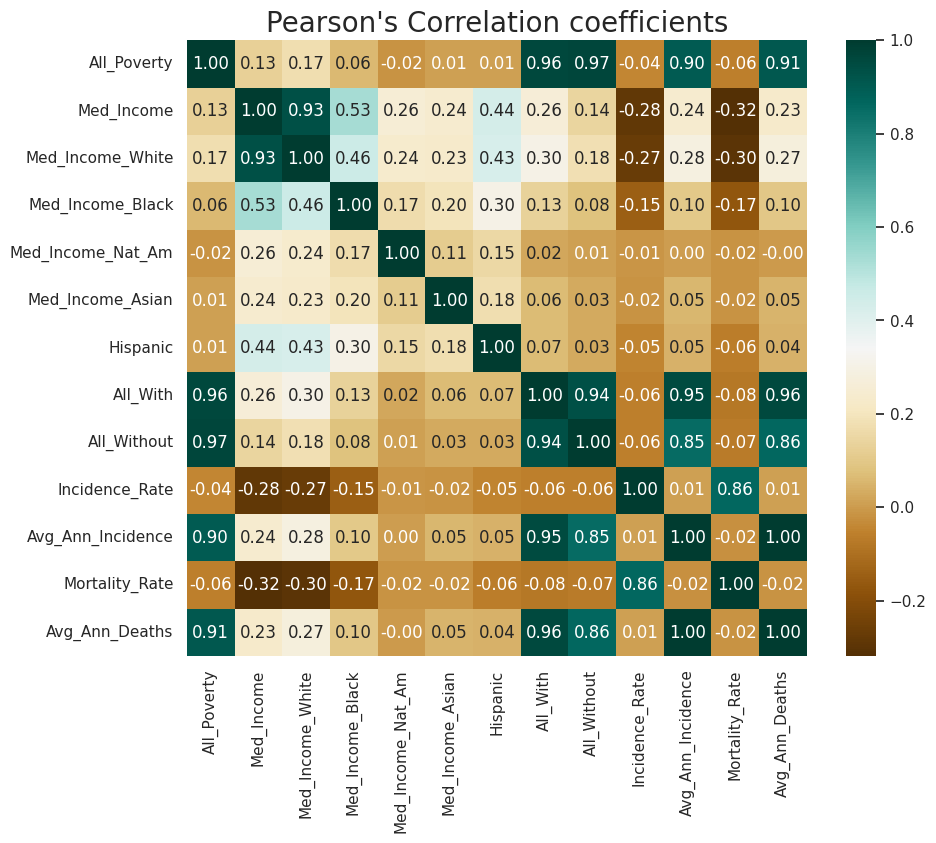

In [284]:
get_corr_plot(merged_data)

## Making dataset for four different models

In [285]:
Avg_Ann_Death_data=copy.deepcopy(merged_data.drop(['Incidence_Rate','Avg_Ann_Incidence','Mortality_Rate'],axis=1))
Incidence_Rate_data=copy.deepcopy(merged_data.drop(['Avg_Ann_Deaths','Avg_Ann_Incidence','Mortality_Rate'],axis=1))
Avg_Ann_Incidence_data=copy.deepcopy(merged_data.drop(['Incidence_Rate','Avg_Ann_Deaths','Mortality_Rate'],axis=1))
Mortality_Rate_data=copy.deepcopy(merged_data.drop(['Incidence_Rate','Avg_Ann_Incidence','Avg_Ann_Deaths'],axis=1))

##Get the outliers and data distribution

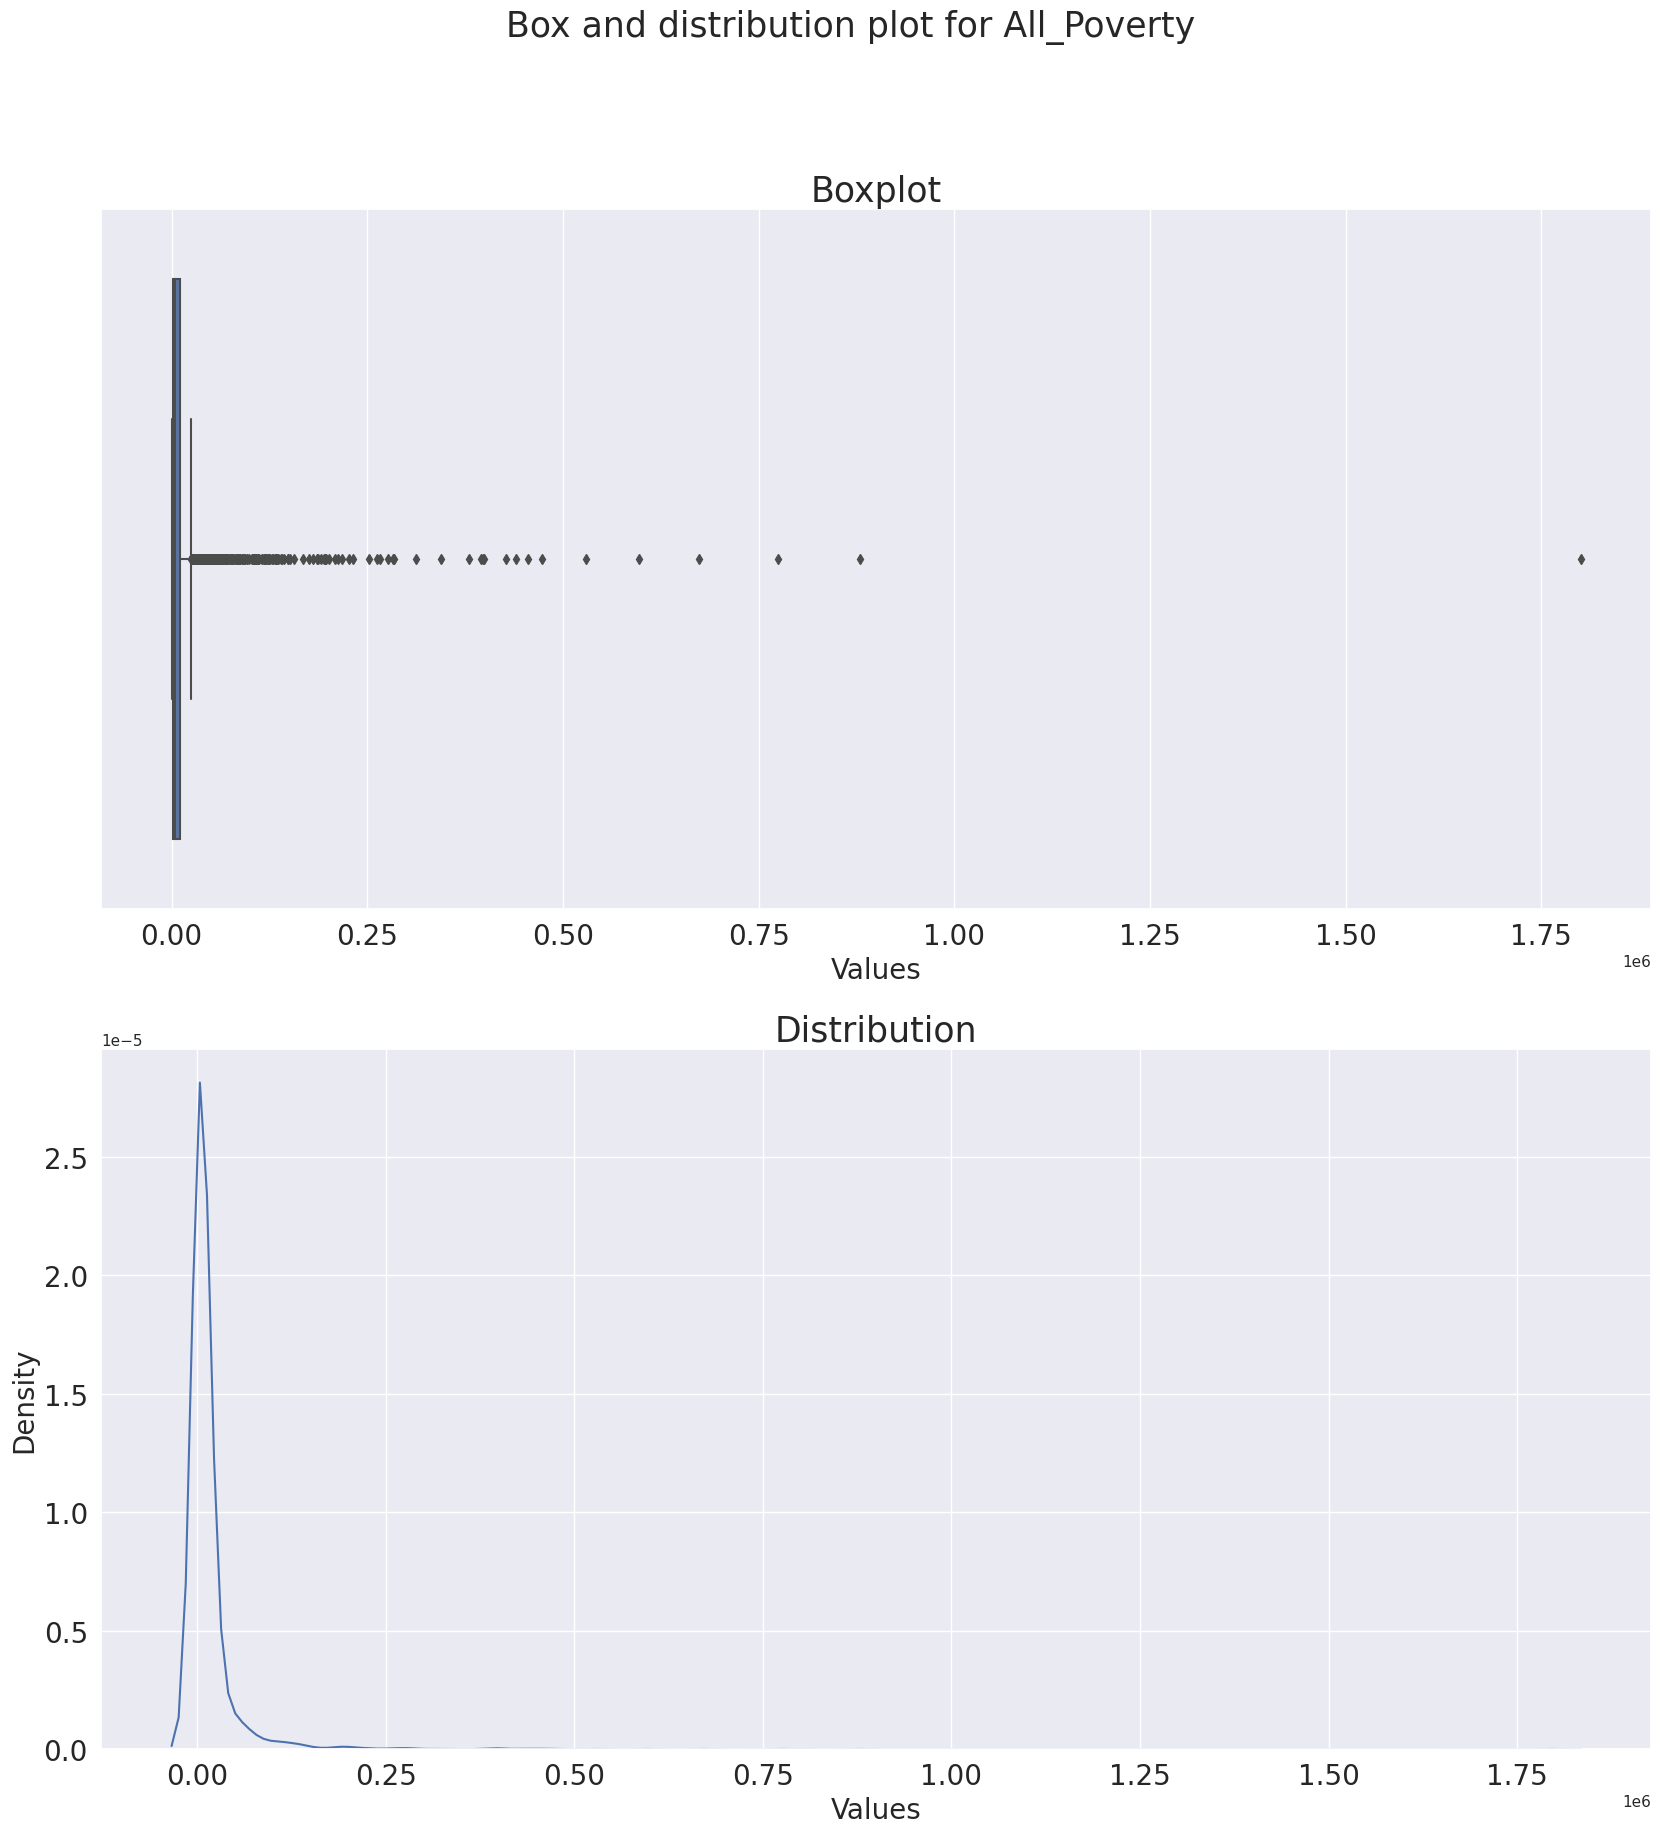

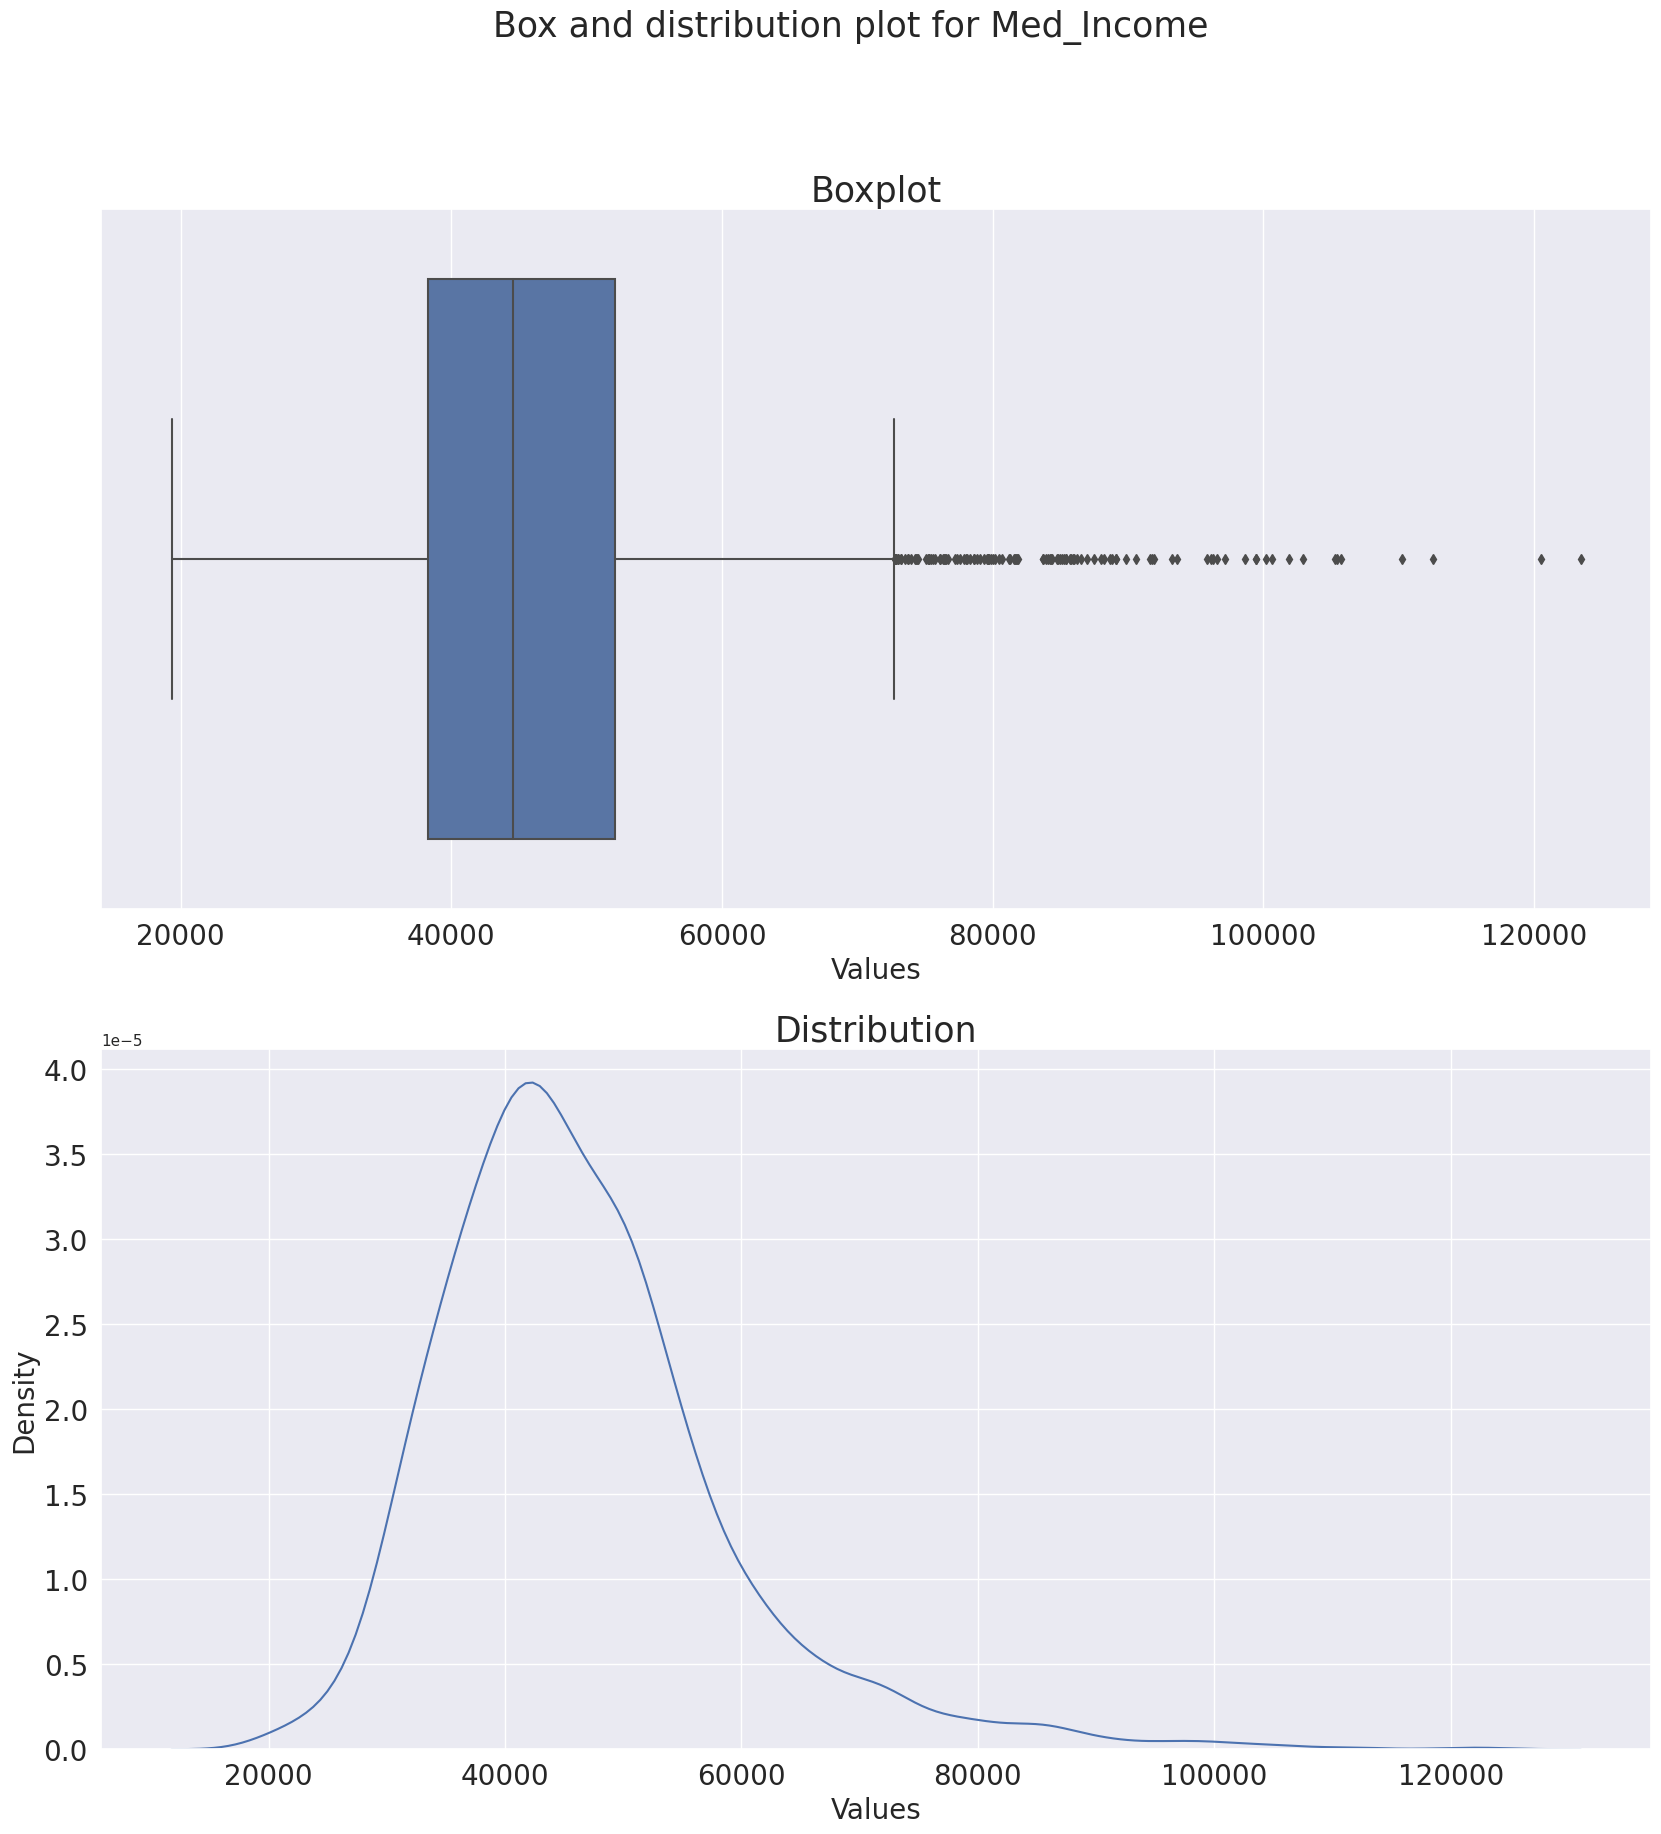

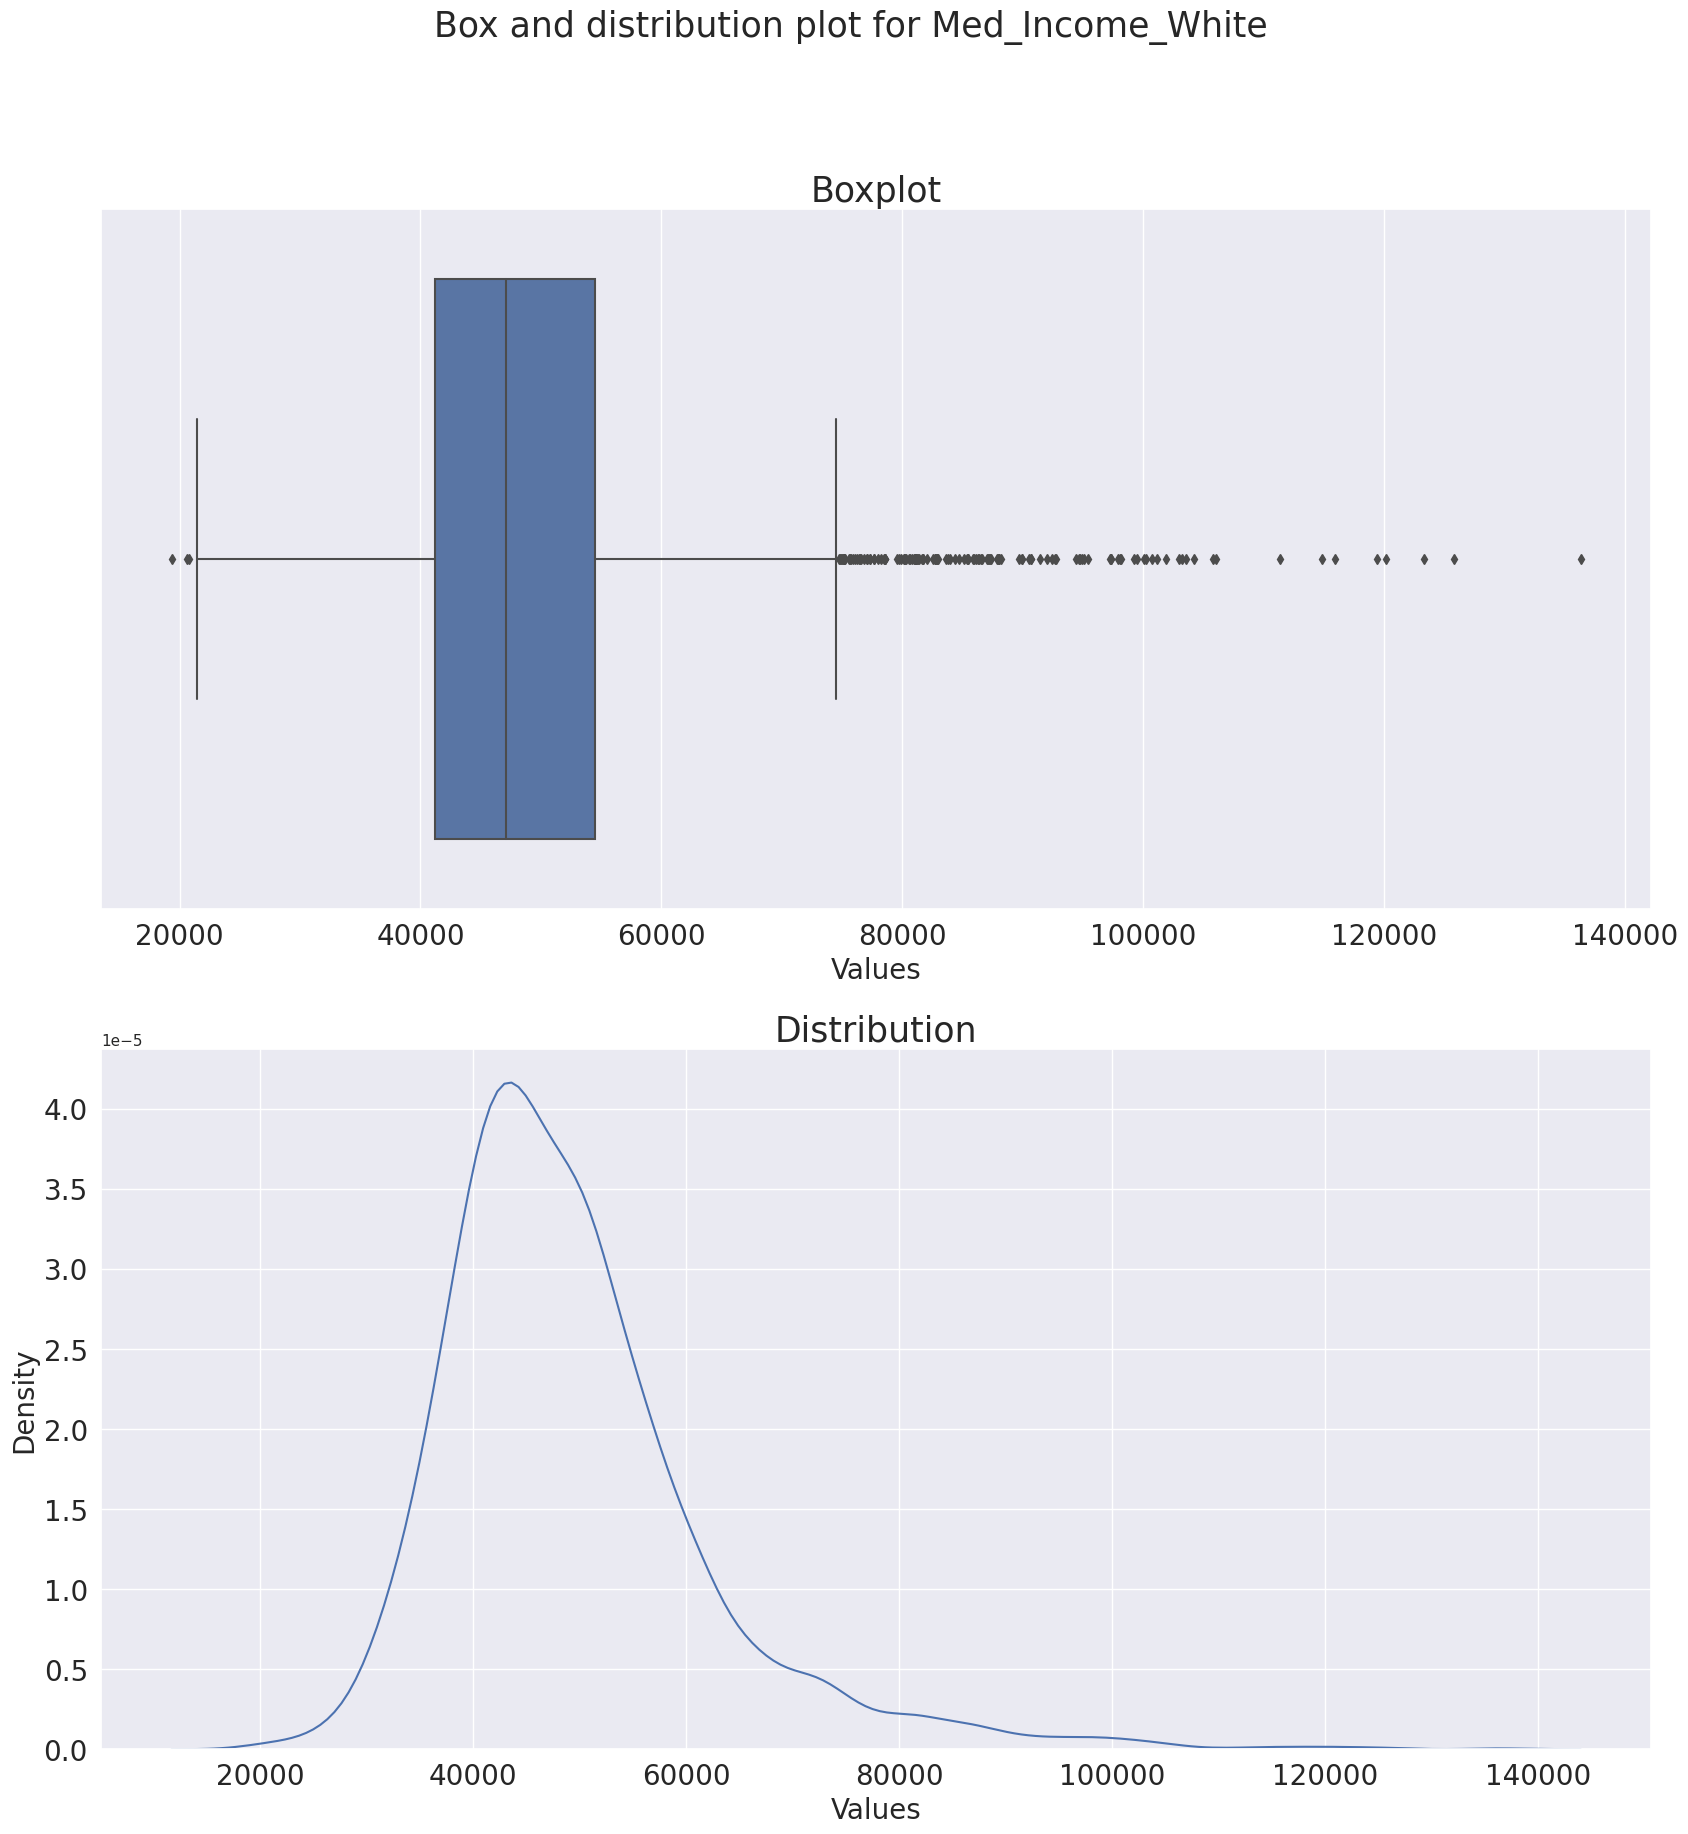

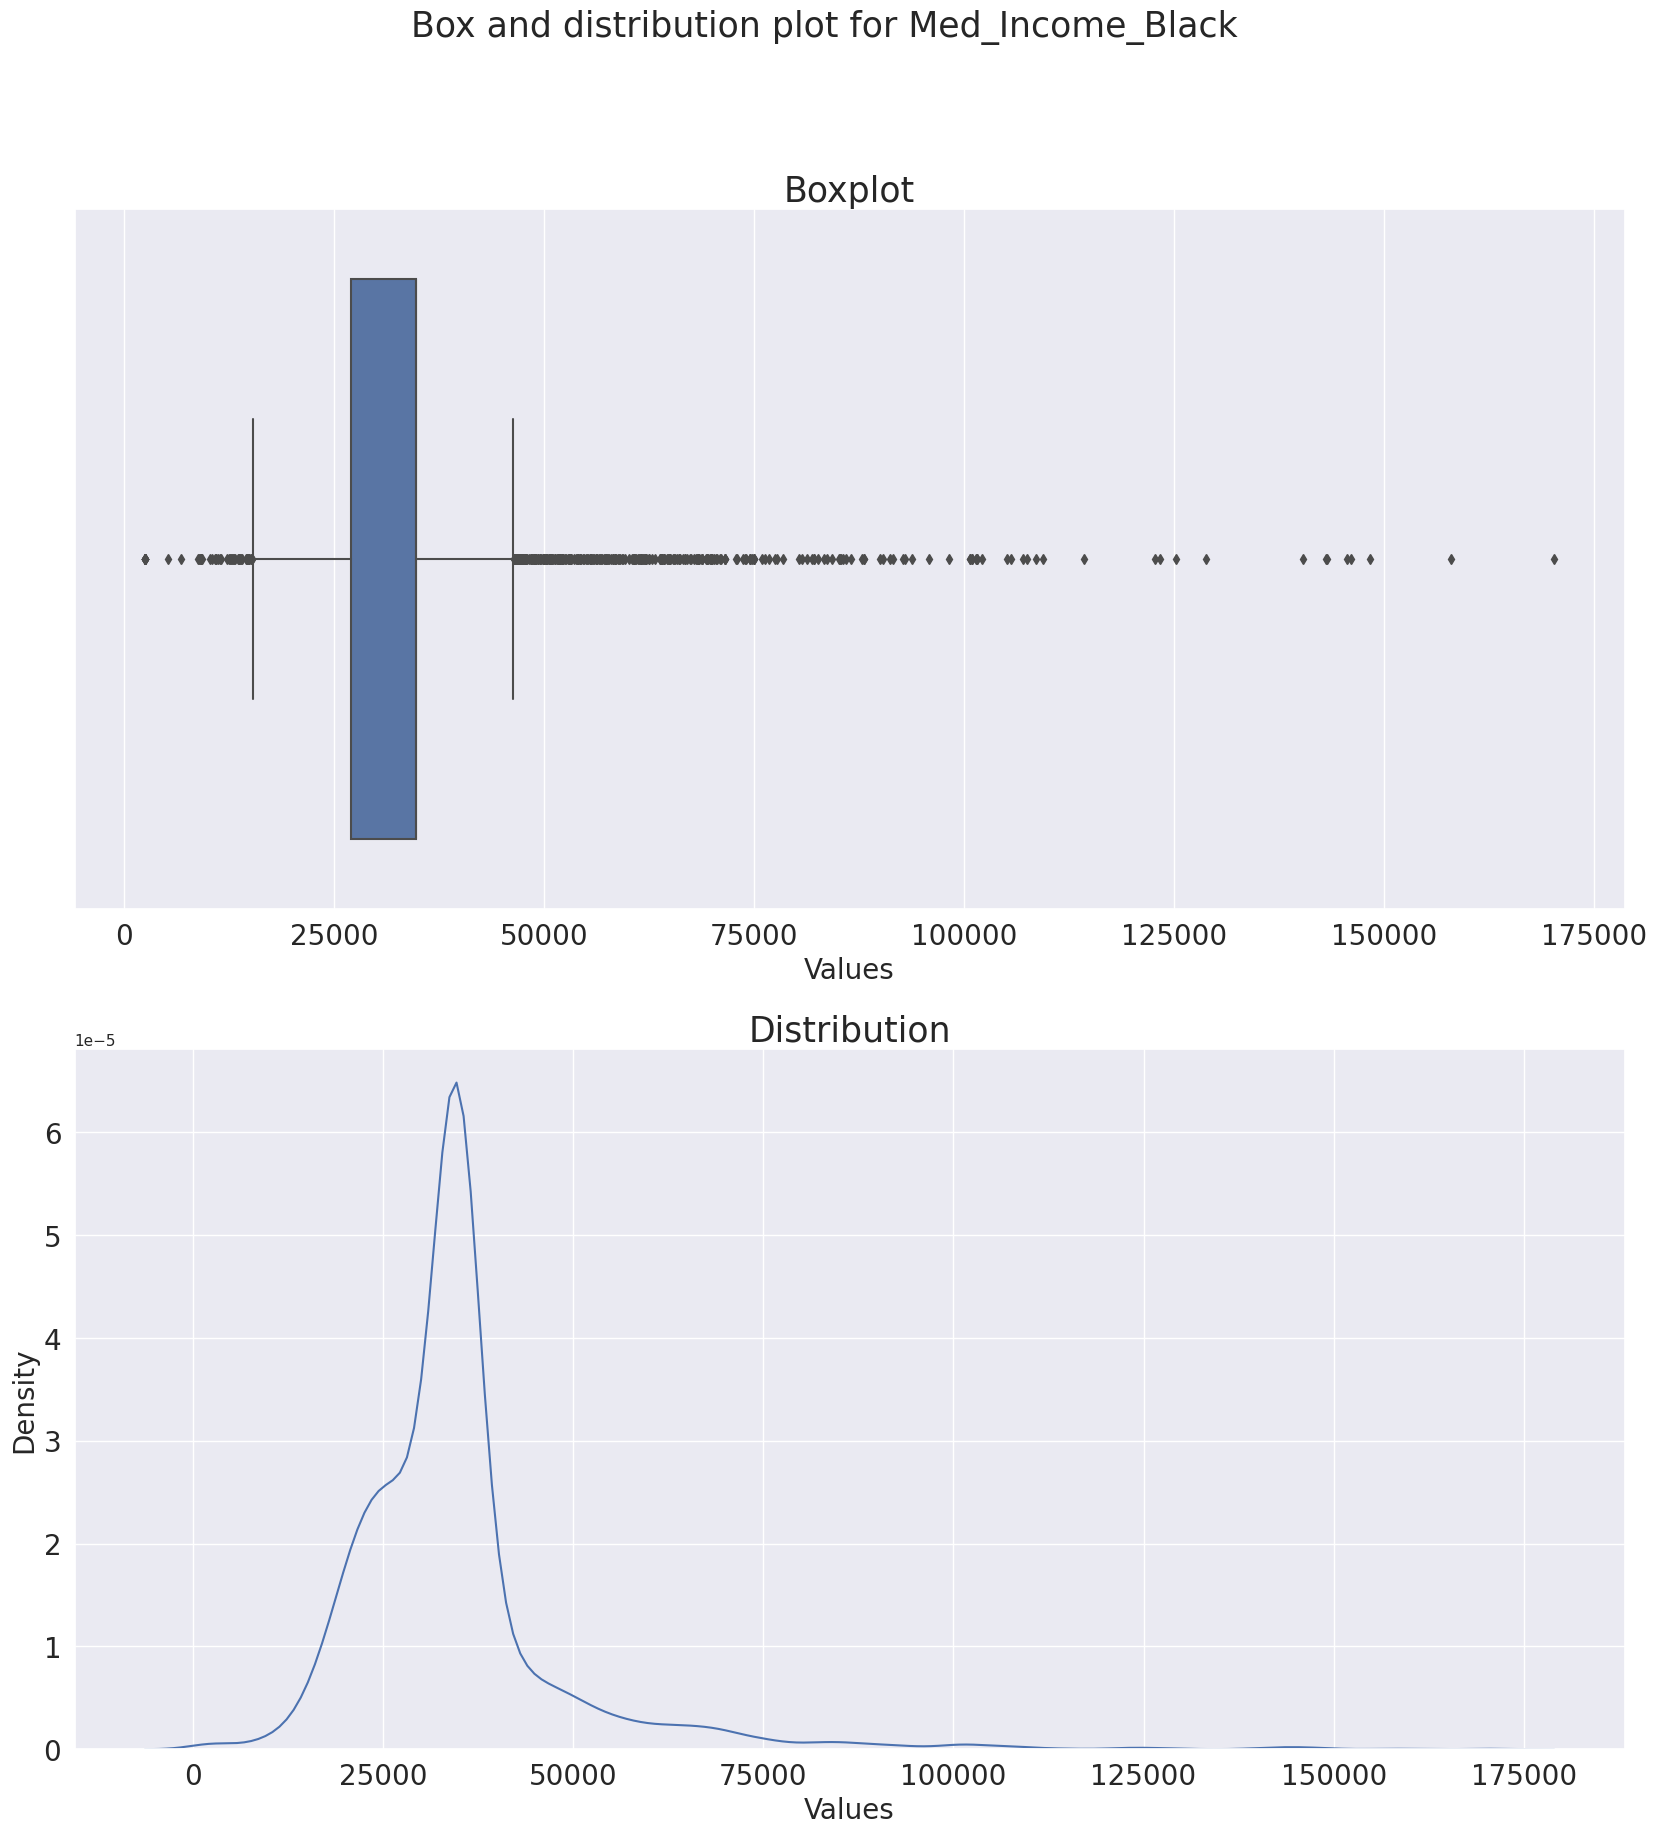

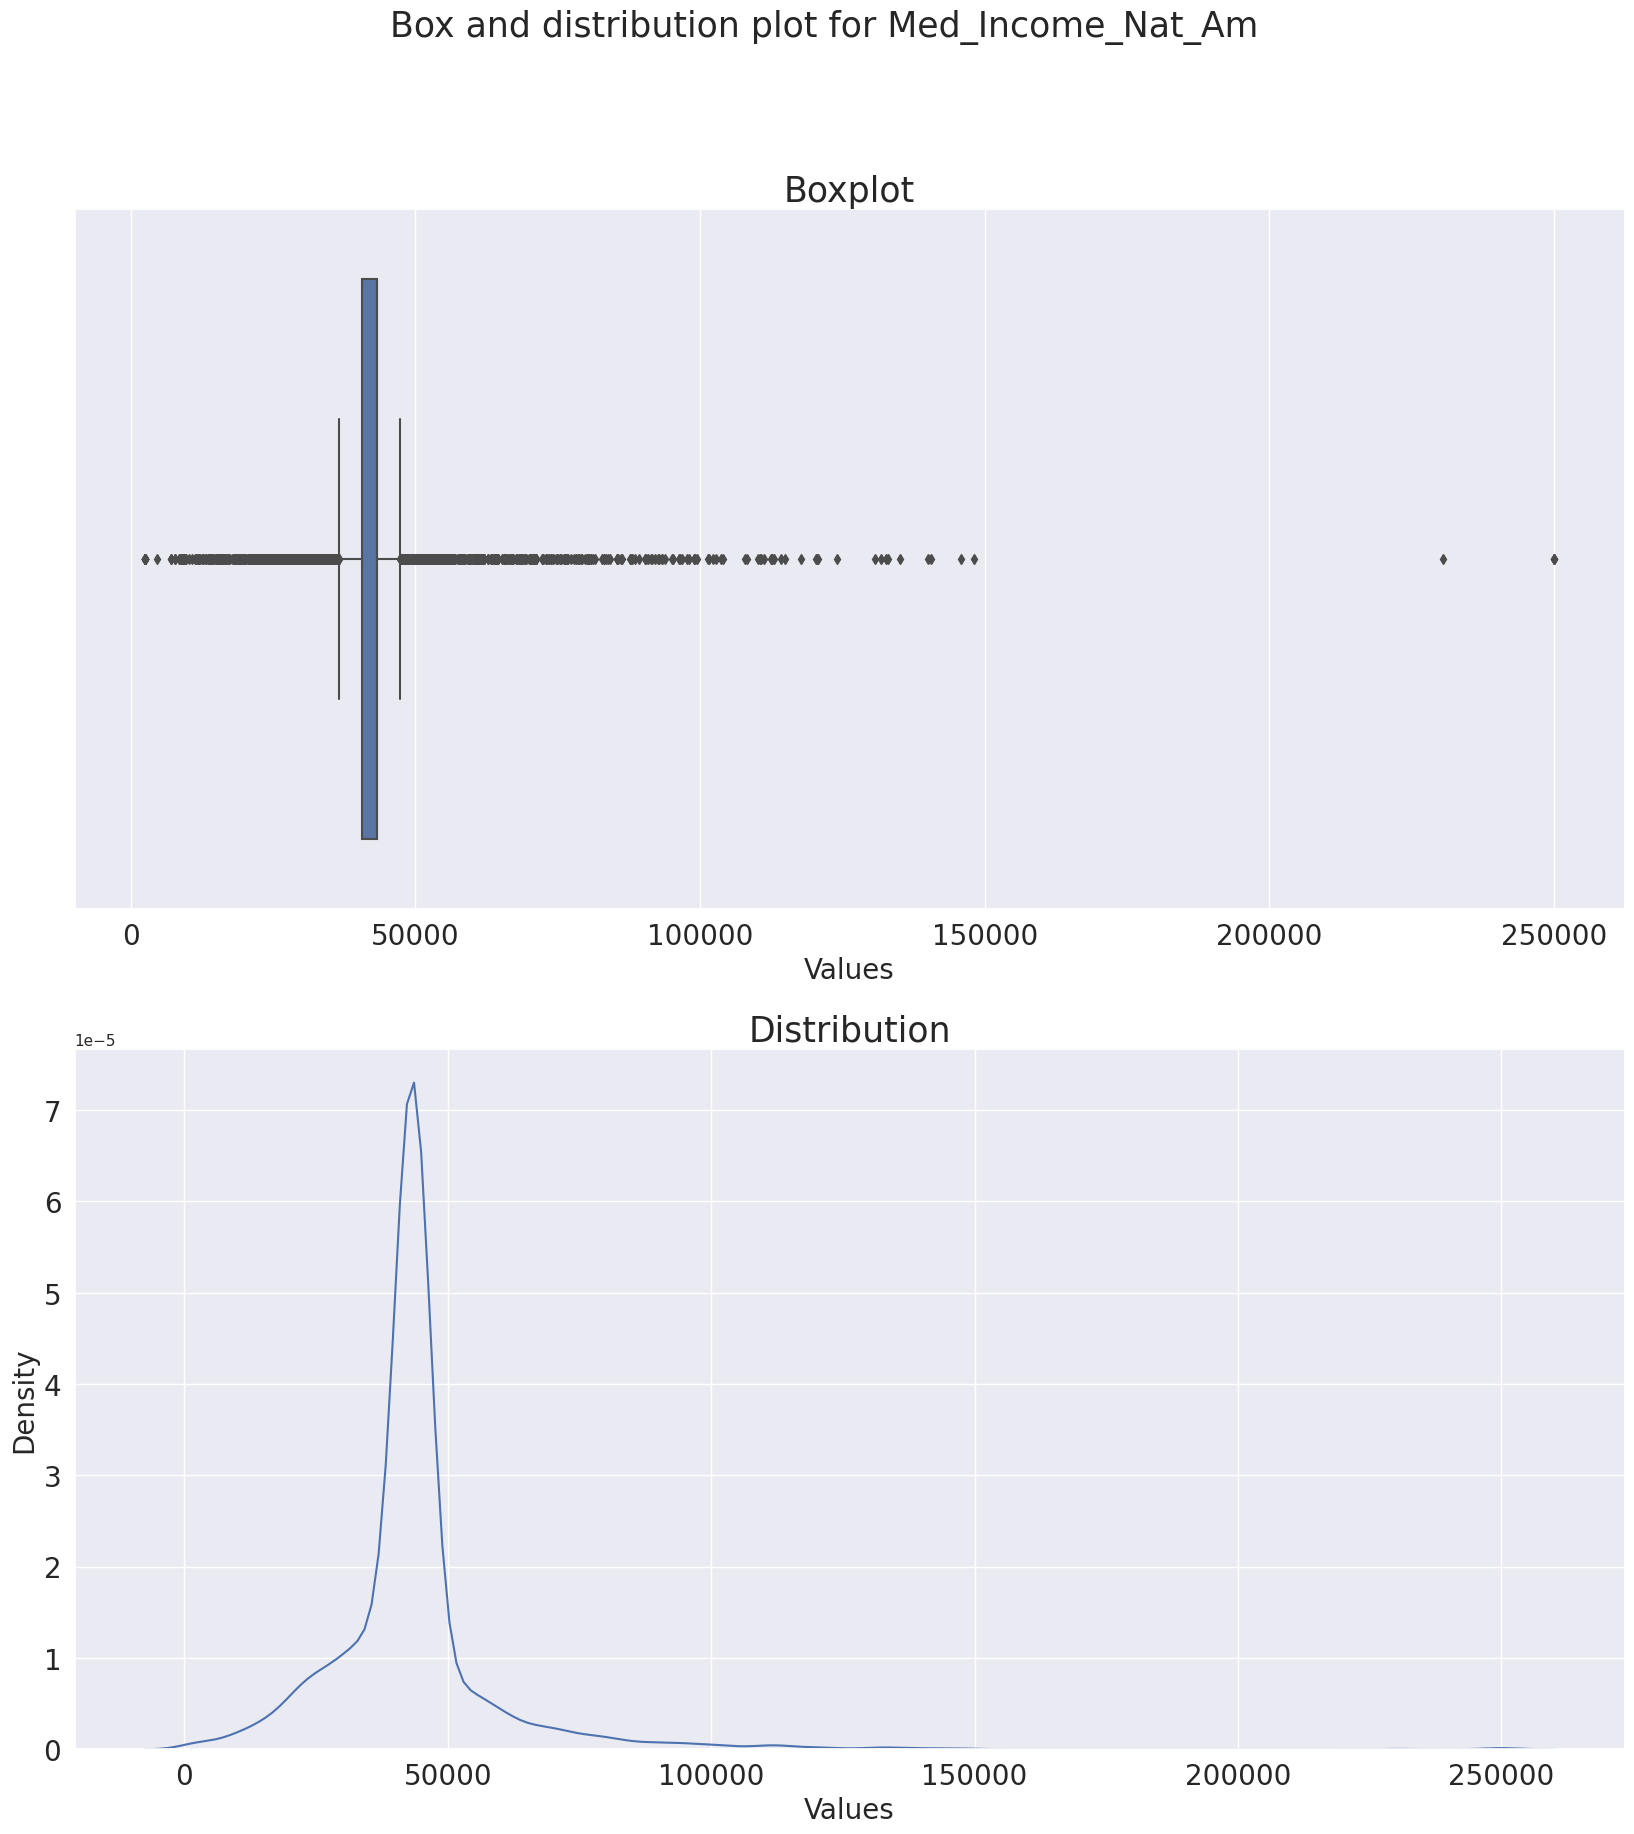

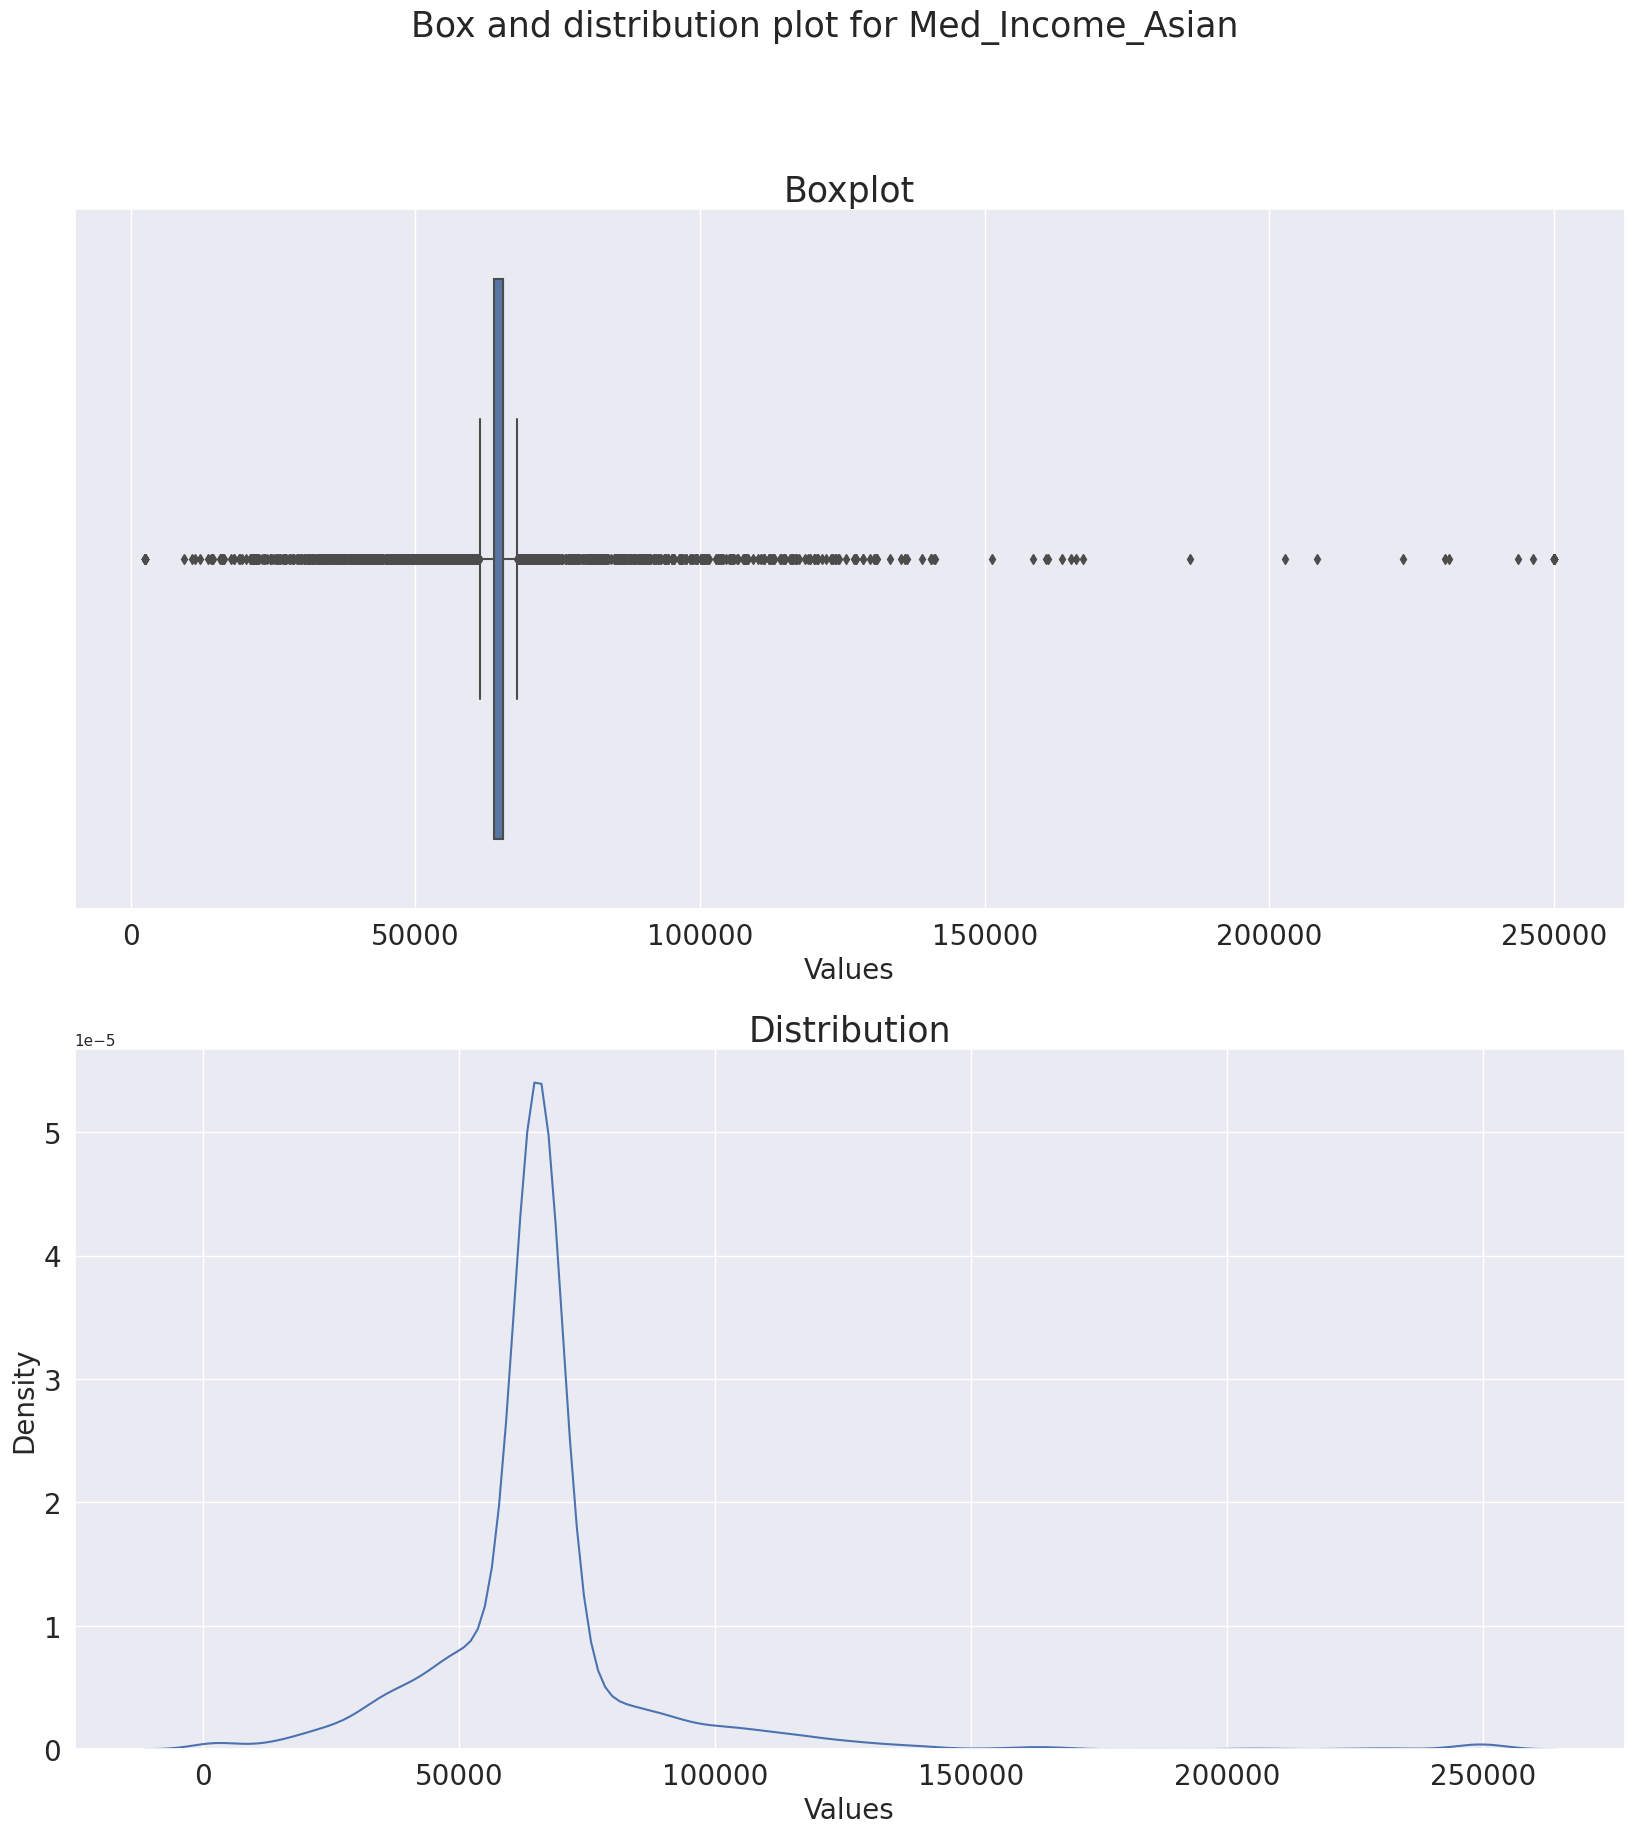

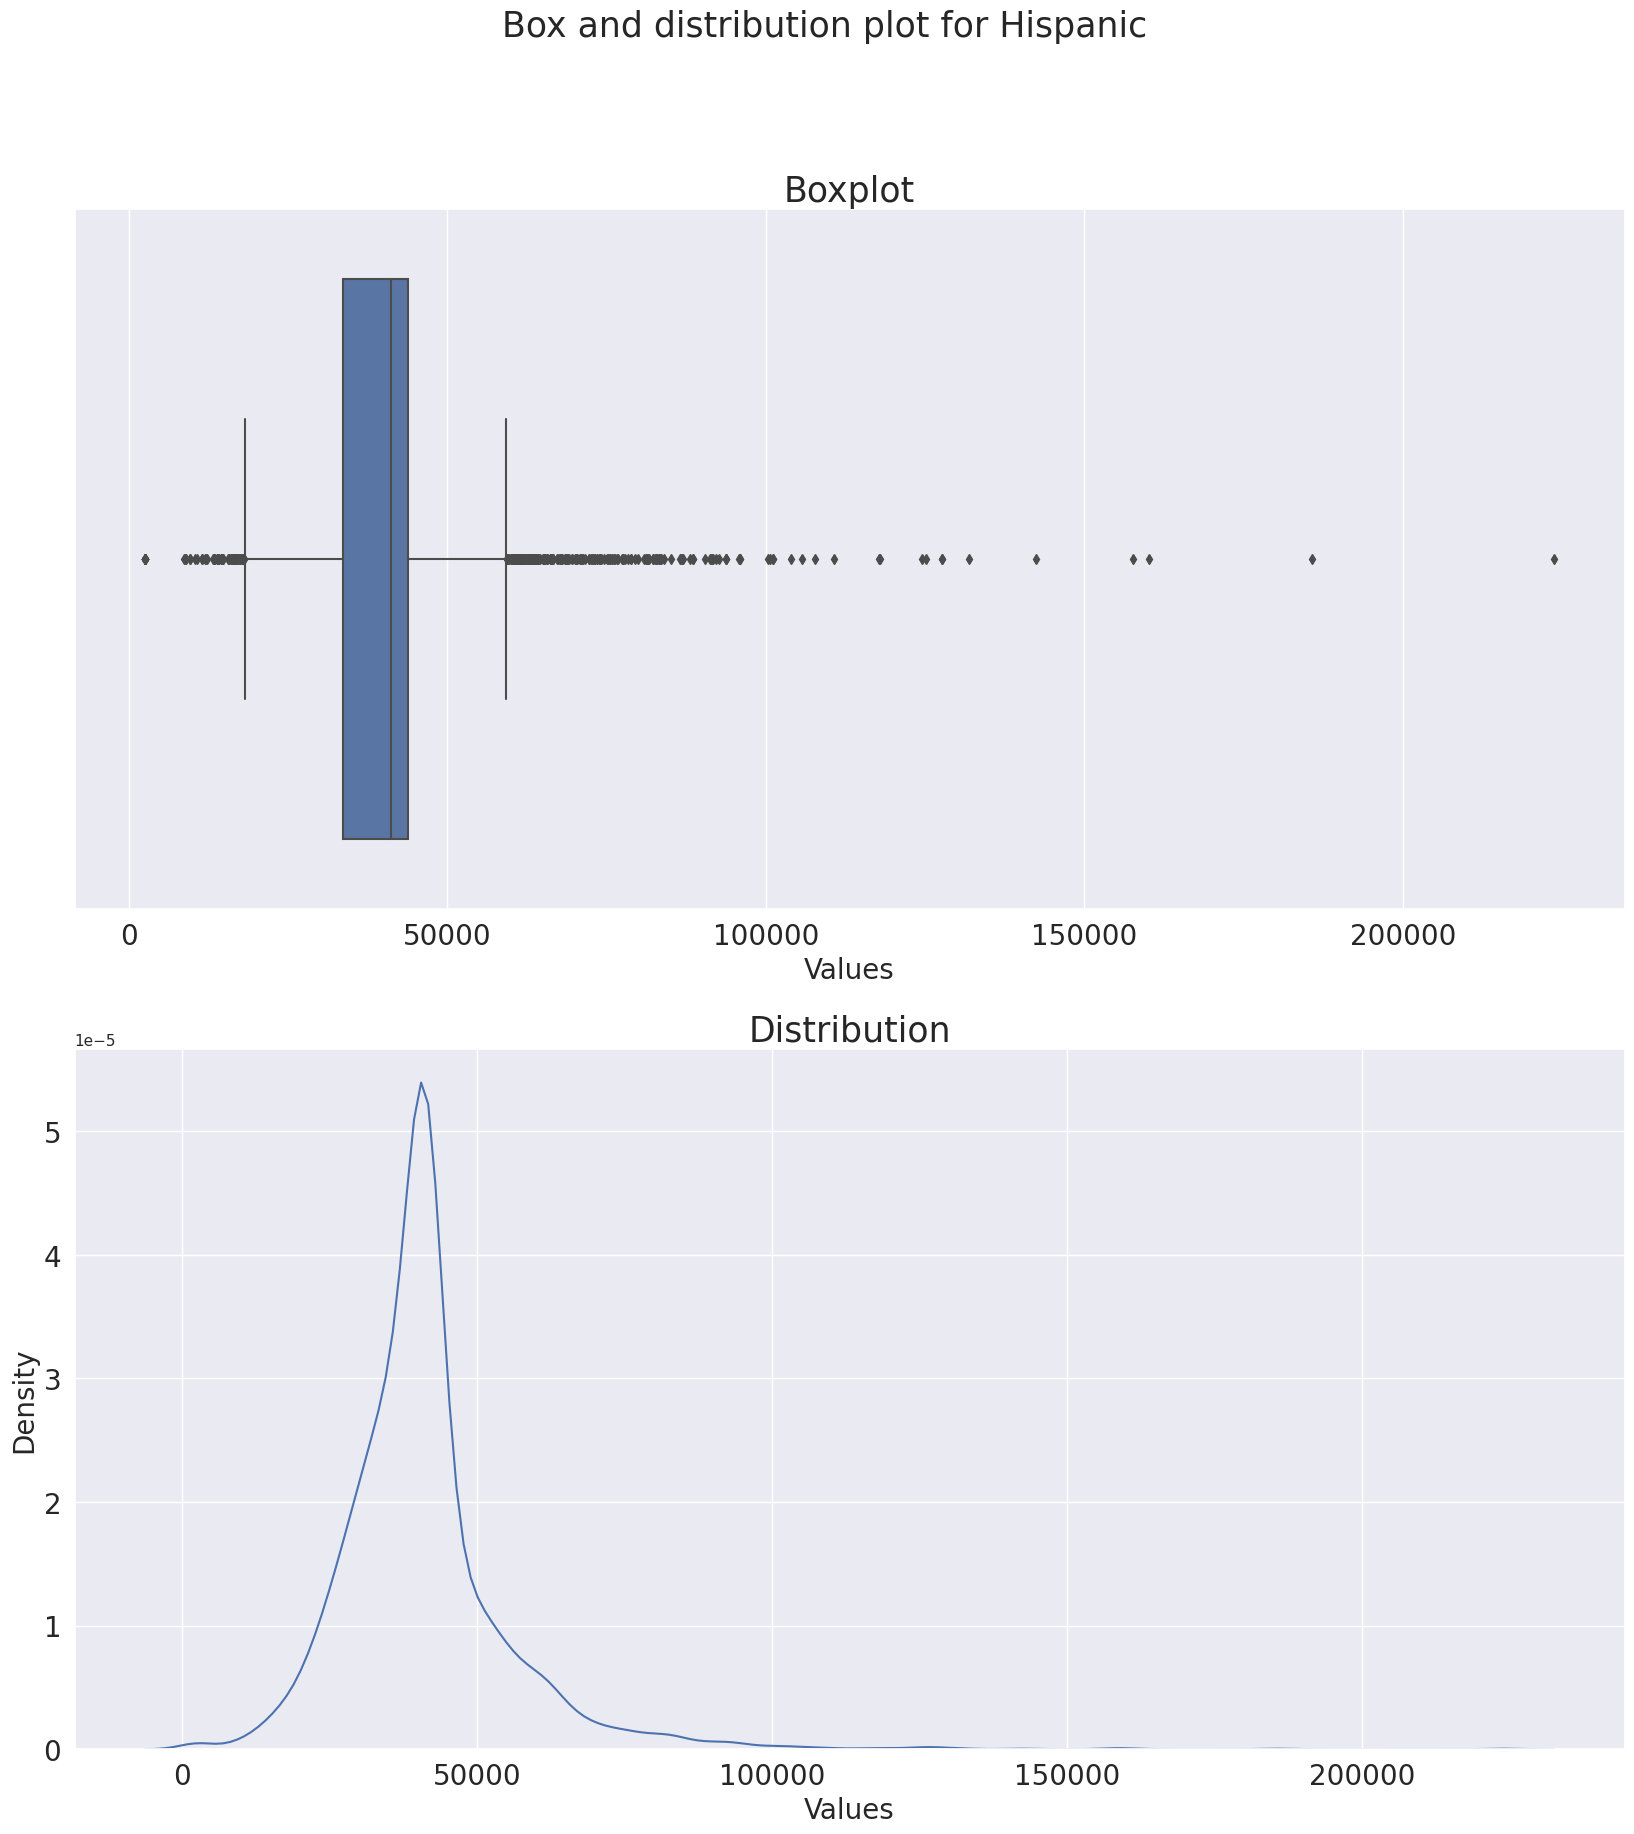

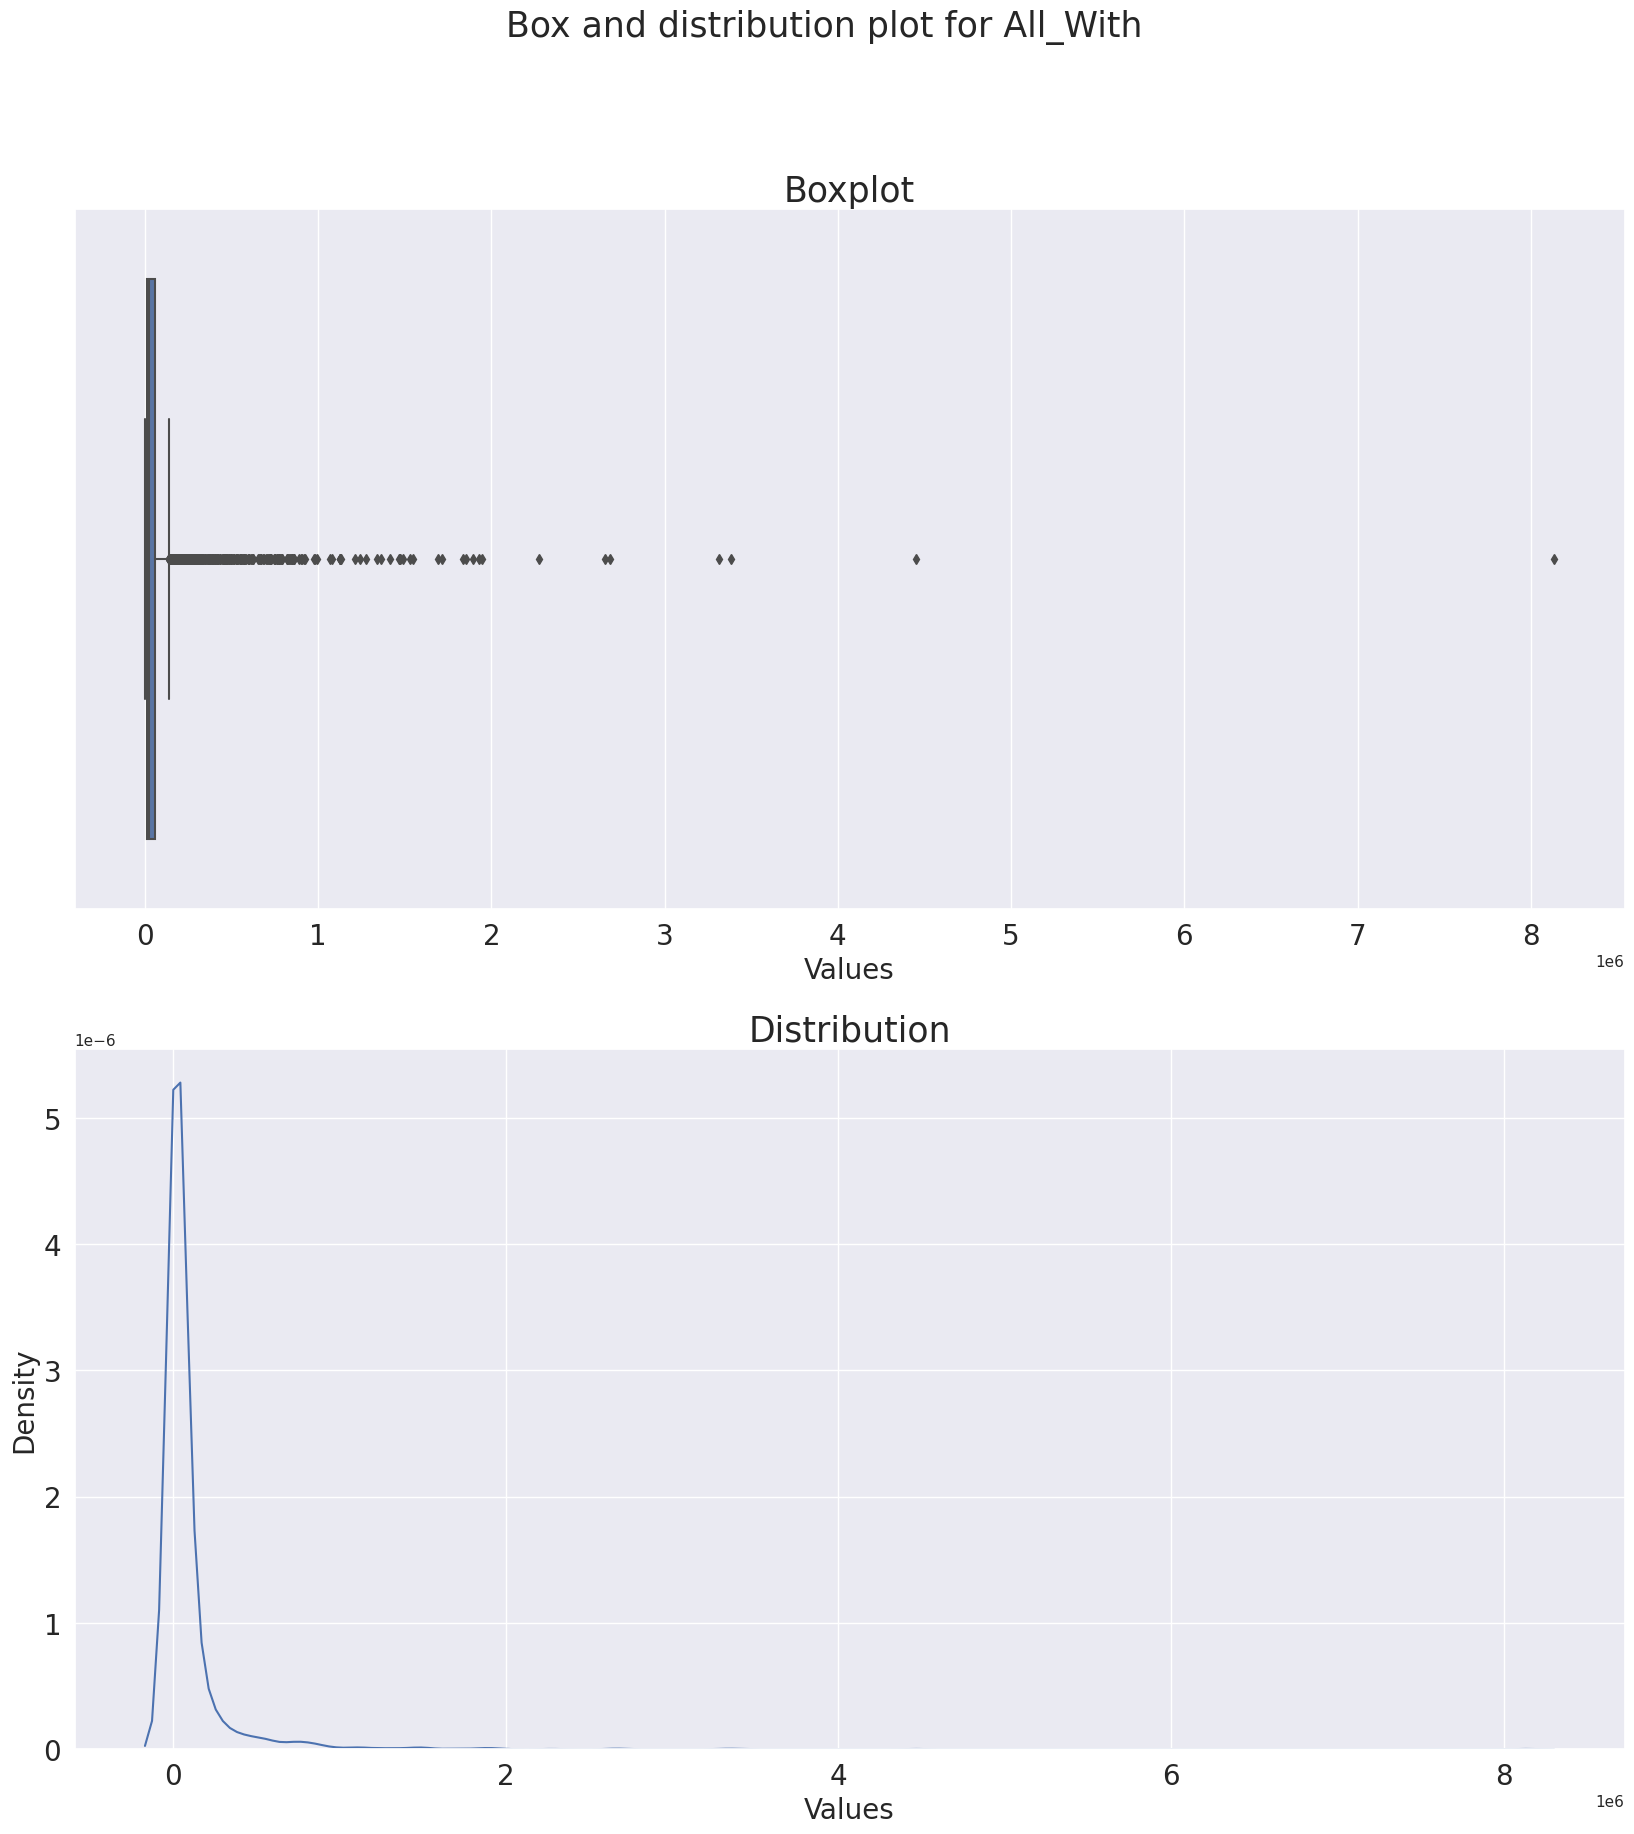

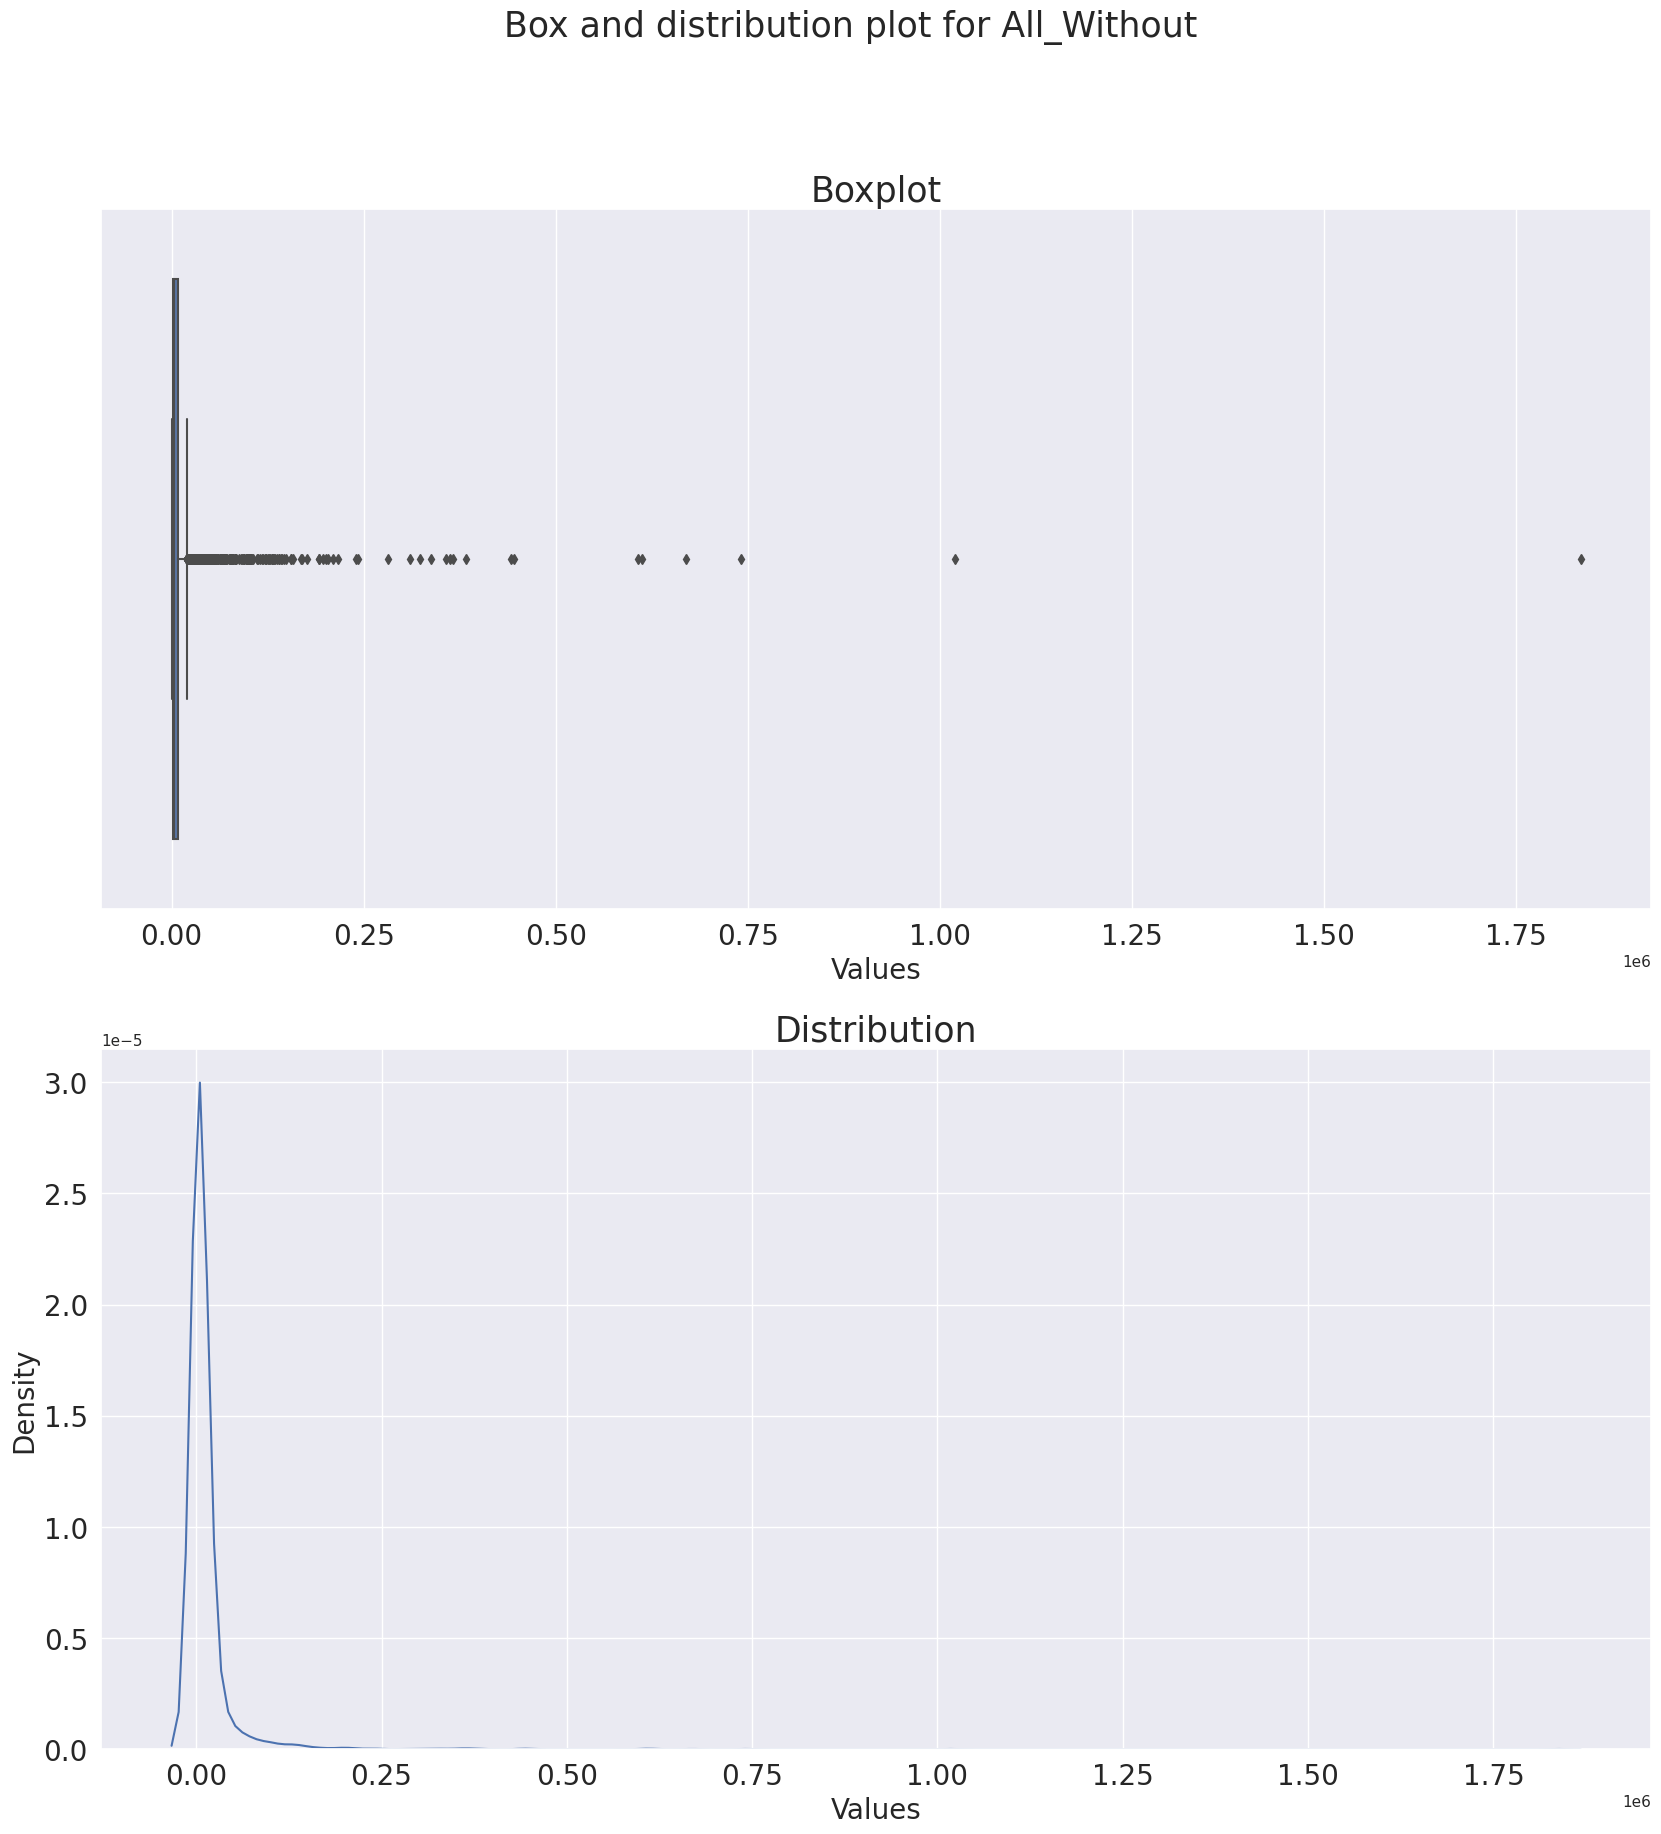

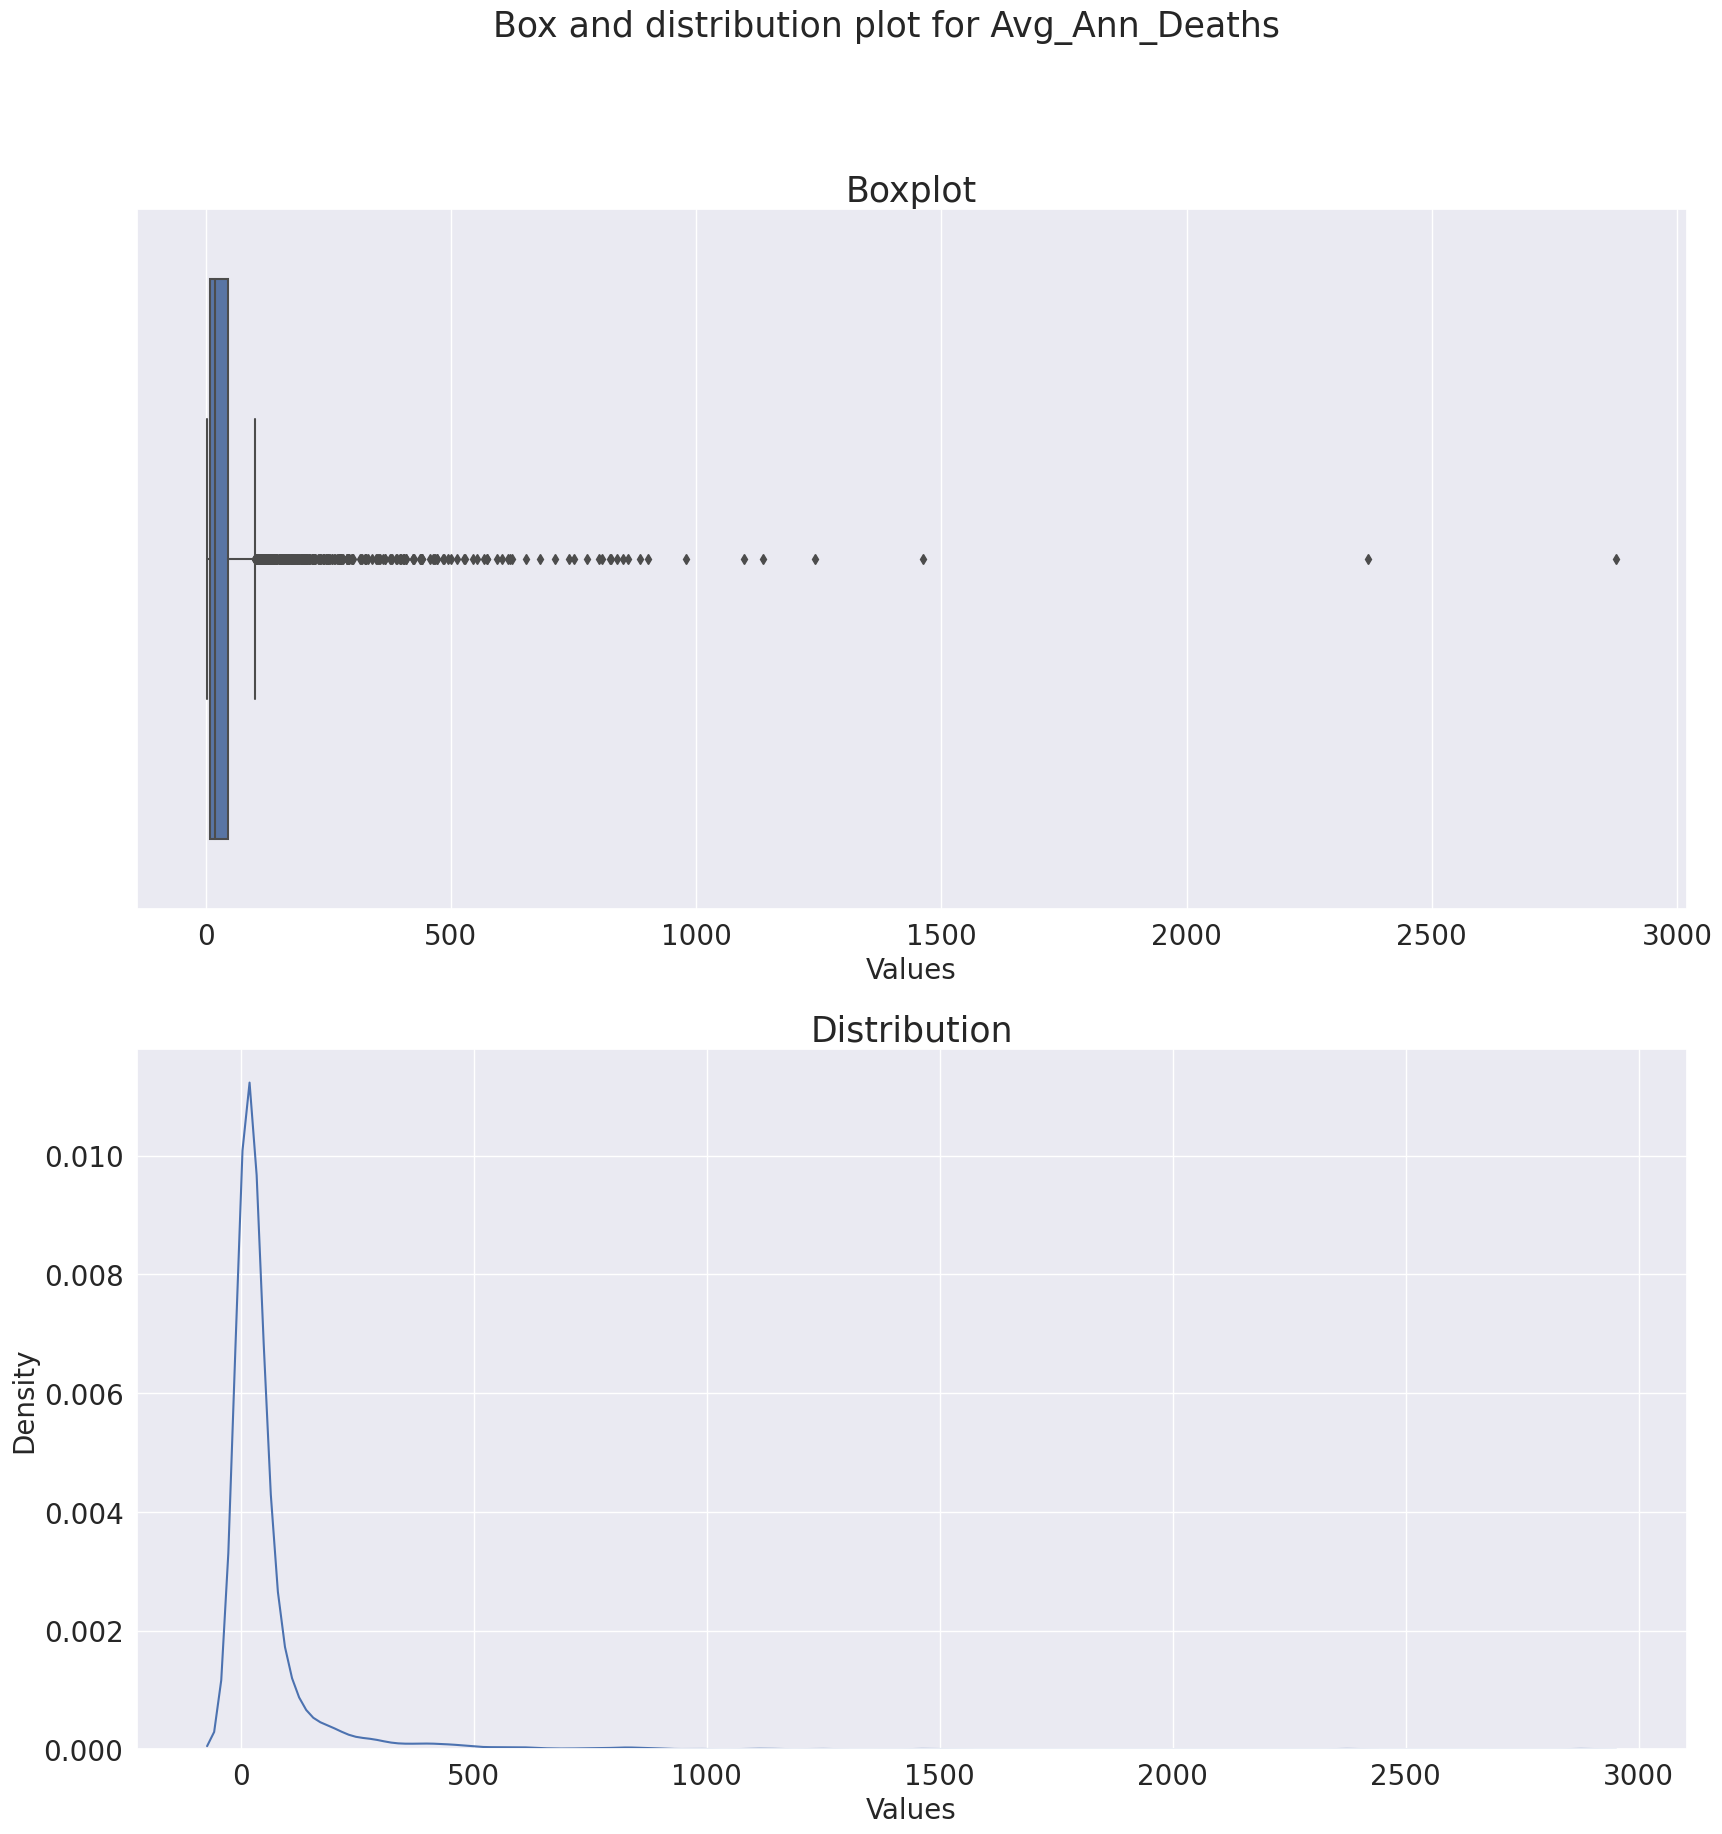

In [286]:
get_box_plots(Avg_Ann_Death_data,save=True)

In [287]:
def Outlier_remove(data,thresh=1.5):
  """
  eliminates the outlier at a given threshold of standard deviation default is 1.5
  data : a dataframe

  """
  z=z=np.abs(stats.zscore(data))#get the z score
  final_data = data[(z < thresh).all(axis=1)]
  return final_data

## Drop the outliers lying above 1.5$\sigma$ away from mean. Note we tried with several values of thresholds. Keeping small threshold resulted complete removal of outliers at the cost of loosing out training data. Model trained on less data causes overfitting. With too many outliers on the other hand causes model to make false prediction. So with all this 1.5 turned out to be the best choice

In [288]:
Avg_Ann_Death_wo = Outlier_remove(Avg_Ann_Death_data)#Remove the outliers

##Extract target column Avg_Ann_Deaths

In [289]:
Avg_Ann_Death_Target=Avg_Ann_Death_wo.pop('Avg_Ann_Deaths')

##Final Correlation before model training

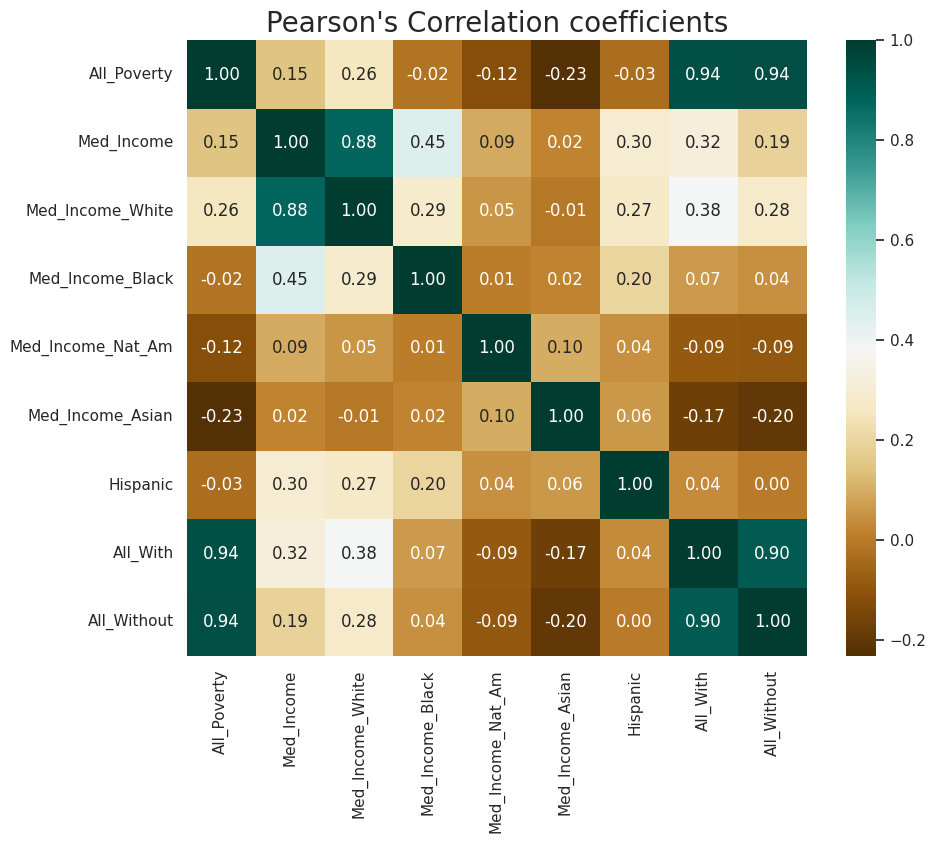

In [290]:
get_corr_plot(Avg_Ann_Death_wo)#correlation heatmap

#Model for Avg_Ann_Deaths target
##Initial Model
test_split=0.2

random_state=90

In [291]:
lm0=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(Avg_Ann_Death_wo,Avg_Ann_Death_Target,test_size=0.2,random_state=90)#spilt into train and test
S=StandardScaler()#Standardizing the data to have 0 mean and 1 standard deviation
X_train=S.fit_transform(X_train)#Standardizing the train data to have 0 mean and 1 standard deviation
X_test=S.fit_transform(X_test)#Standardizing the test data to have with mean and standard deviation of train data
lm0.fit(X_train,y_train)#training
yhat_test=lm0.predict(X_test)#predict the output
print("R squared score of the model : {}".format(r2_score(y_test,yhat_test)))#gives the R2 score

R squared score of the model : 0.8971523333433324


## Model Evaluation by residual plot

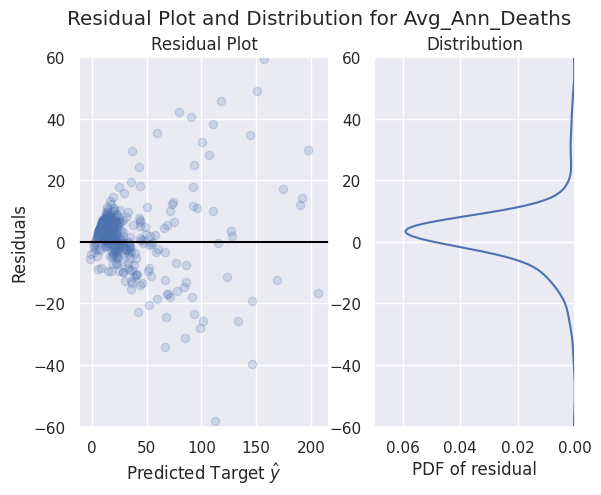

In [292]:
get_residual_plot(y_test,yhat_test,col="Avg_Ann_Deaths",save=False)

The error is nearly normally distributed with mean nearly 0

##Visualizing which input feature is contributing largest towards the output

In [293]:
perm = PermutationImportance(lm0, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = Avg_Ann_Death_wo.columns.tolist())

Weight,Feature
1.4893 ± 0.1331,All_With
0.0305 ± 0.0055,All_Poverty
0.0184 ± 0.0097,Med_Income_White
0.0150 ± 0.0044,Med_Income
0.0063 ± 0.0032,Med_Income_Black
0.0016 ± 0.0008,Med_Income_Asian
-0.0000 ± 0.0001,All_Without
-0.0001 ± 0.0006,Hispanic
-0.0004 ± 0.0011,Med_Income_Nat_Am


##Extracting the most important feature (All_With) to obtain a univariate linear regression for best fit visualisation

In [294]:
X_new_train=np.zeros((X_train.shape[0],1))
X_new_test=np.zeros((X_test.shape[0],1))
X_new_train[:,0]=X_train[:,7]#7th coulumn is All_With
X_new_test[:,0]=X_test[:,7]#7th coulumn is All_With

##Univariate model

In [295]:
lm0_new=LinearRegression()
lm0_new.fit(X_new_train,y_train)
yhat_new_train=lm0_new.predict(X_new_train)
yhat_new_test=lm0_new.predict(X_new_test)
print("R squared score of the model : {}".format(r2_score(y_test,yhat_new_test)))#gives the R2 score of new model (improved)

R squared score of the model : 0.8976423526607586


##Residual plot for univariate model

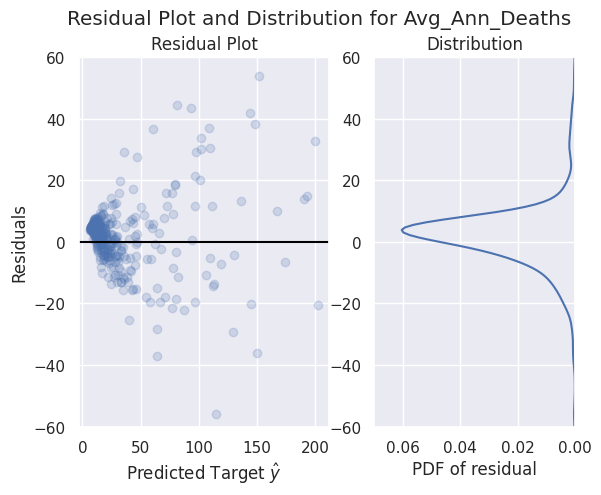

In [296]:
get_residual_plot(y_test,yhat_new_test,col="Avg_Ann_Deaths",save=False)

## get the model weight (w) and bias (b)

In [297]:
print(f"w: {lm0_new.coef_[0]}")
print(f"b: {lm0_new.intercept_}")

w: 35.4104050079414
b: 31.612046632124354


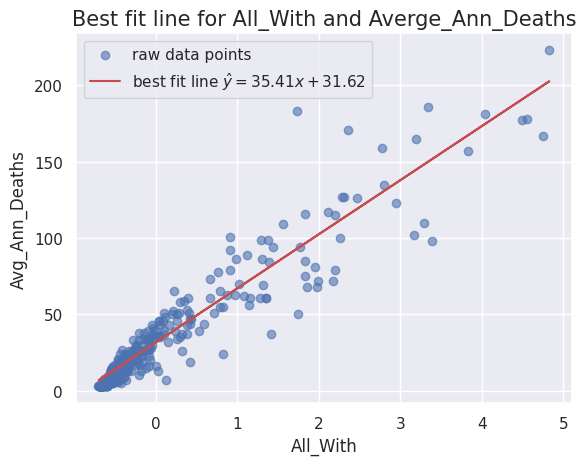

In [298]:
y_line=lm0_new.coef_[0]*np.sort(X_new_test)+lm0_new.intercept_
plt.scatter(X_new_test,y_test,alpha=0.6,label='raw data points')
plt.plot(np.sort(X_new_test),y_line,color='r',label='best fit line $\hat{y}=35.41x+31.62$')
plt.xlabel("All_With")
plt.ylabel("Avg_Ann_Deaths")
plt.legend()
plt.title("Best fit line for All_With and Averge_Ann_Deaths",fontsize=15)
plt.show()

# Model for Incidence Rate

In [299]:
Incidence_Rate_data_wo=Outlier_remove(Incidence_Rate_data)#Remove the outliers

In [300]:
Incid_Target=Incidence_Rate_data_wo.pop('Incidence_Rate')#get the target

In [301]:
lm1=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(Incidence_Rate_data_wo,Incid_Target,test_size=0.2,random_state=90)#spilt into train and test
S=StandardScaler()#Standardizing the data to have 0 mean and 1 standard deviation
X_train=S.fit_transform(X_train)#Standardizing the train data to have 0 mean and 1 standard deviation
X_test=S.fit_transform(X_test)#Standardizing the test data to have with mean and standard deviation of train data
lm1.fit(X_train,y_train)#training
yhat_test=lm1.predict(X_test)#predict the output
print("R squared score of the model : {}".format(r2_score(y_test,yhat_test)))#gives the R2 score

R squared score of the model : 0.10040749046317154


## As expected Extremely low $R^2$ score. No need of further visualisation

# Model for Avg_Ann_Incidence

In [302]:
Avg_Ann_Incidence_data_wo=Outlier_remove(Avg_Ann_Incidence_data)

In [303]:
Avg_Ann_Incid_Target=Avg_Ann_Incidence_data_wo.pop('Avg_Ann_Incidence')

## Initial Model

In [304]:
lm2=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(Avg_Ann_Incidence_data_wo,Avg_Ann_Incid_Target,test_size=0.2,random_state=90)#spilt into train and test
S=StandardScaler()#Standardizing the data to have 0 mean and 1 standard deviation
X_train=S.fit_transform(X_train)#Standardizing the train data to have 0 mean and 1 standard deviation
X_test=S.fit_transform(X_test)#Standardizing the test data to have with mean and standard deviation of train data
lm2.fit(X_train,y_train)#training
yhat_test=lm2.predict(X_test)#predict the output
print("R squared score of the model : {}".format(r2_score(y_test,yhat_test)))#gives the R2 score

R squared score of the model : 0.8826989065340853


## Residual plot of original model

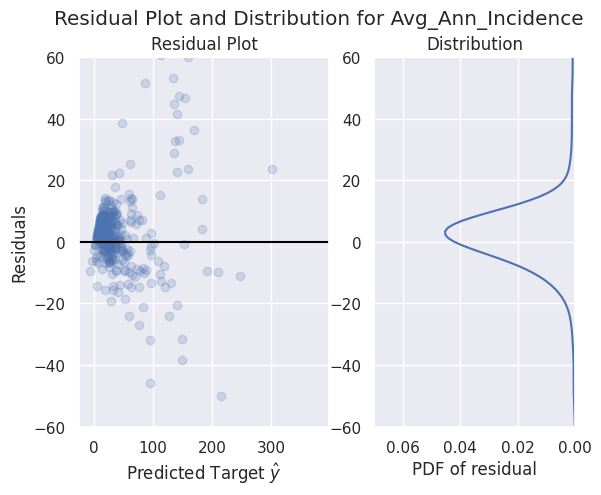

In [305]:
get_residual_plot(y_test,yhat_test,col="Avg_Ann_Incidence",save=False)

##Visualizing which input feature is contributing largest towards the output

In [306]:
perm = PermutationImportance(lm2, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = Avg_Ann_Incidence_data_wo.columns.tolist())

Weight,Feature
1.6518 ± 0.1292,All_With
0.0326 ± 0.0105,Med_Income_White
0.0142 ± 0.0054,Med_Income
0.0072 ± 0.0052,Med_Income_Black
0.0013 ± 0.0006,Med_Income_Asian
0.0001 ± 0.0005,Hispanic
-0.0003 ± 0.0012,Med_Income_Nat_Am
-0.0044 ± 0.0027,All_Without
-0.0053 ± 0.0062,All_Poverty


## Here also All_With is most important feature

In [307]:
X_new_train=np.zeros((X_train.shape[0],1))
X_new_test=np.zeros((X_test.shape[0],1))
X_new_train[:,0]=X_train[:,7]#7th coulumn is All_With
X_new_test[:,0]=X_test[:,7]#7th coulumn is All_With

##Univariate model

In [308]:
lm2_new=LinearRegression()
lm2_new.fit(X_new_train,y_train)#training
yhat_new_test=lm2_new.predict(X_new_test)#predict the output
print("R squared score of the model : {}".format(r2_score(y_test,yhat_new_test)))#gives the R2 score of new model (improved)

R squared score of the model : 0.8864134287726704


##Residual plot for univariate model

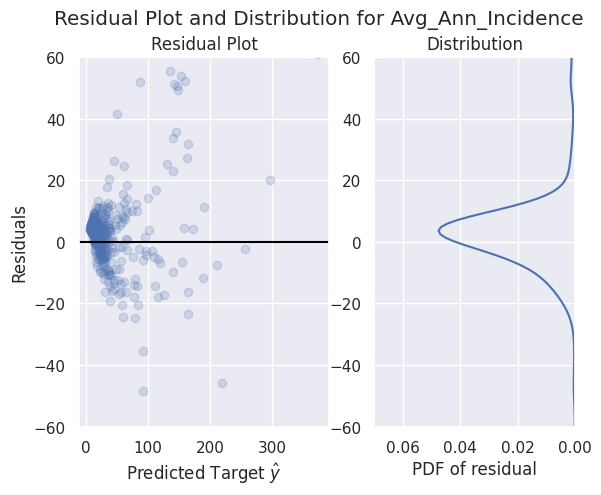

In [309]:
get_residual_plot(y_test,yhat_new_test,col="Avg_Ann_Incidence",save=False)

## get the model weight (w) and bias (b)

In [310]:
print(f"w: {lm2_new.coef_[0]}")
print(f"b: {lm2_new.intercept_}")

w: 50.29244762050902
b: 42.59405300581771


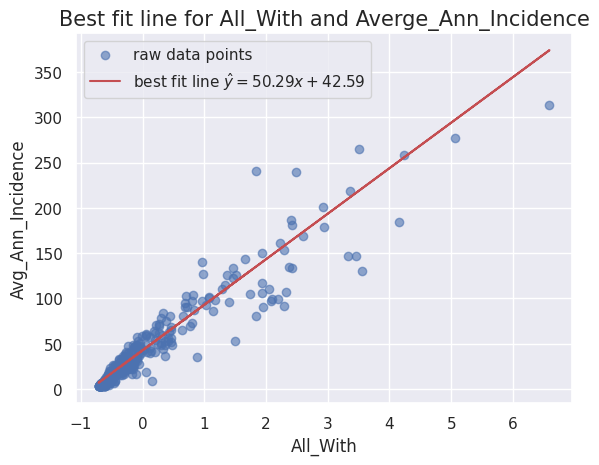

In [311]:
y_line=lm2_new.coef_[0]*np.sort(X_new_test)+lm2_new.intercept_
plt.scatter(X_new_test,y_test,alpha=0.6,label='raw data points')
plt.plot(np.sort(X_new_test),y_line,color='r',label='best fit line $\hat{y}=50.29x+42.59$')
plt.xlabel("All_With")
plt.ylabel("Avg_Ann_Incidence")
plt.legend()
plt.title("Best fit line for All_With and Averge_Ann_Incidence",fontsize=15)
plt.show()

# Model for Mortality Rate

In [312]:
Mortality_Rate_data_wo=Outlier_remove(Mortality_Rate_data)
Mortality_Rate_data_Target=Mortality_Rate_data_wo.pop('Mortality_Rate')
lm3=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(Mortality_Rate_data_wo,Mortality_Rate_data_Target,test_size=0.2,random_state=90)#spilt into train and test
S=StandardScaler()#Standardizing the data to have 0 mean and 1 standard deviation
X_train=S.fit_transform(X_train)#Standardizing the train data to have 0 mean and 1 standard deviation
X_test=S.fit_transform(X_test)#Standardizing the test data to have with mean and standard deviation of train data
lm3.fit(X_train,y_train)#training
yhat_test=lm3.predict(X_test)#predict the output
print("R squared score of the model : {}".format(r2_score(y_test,yhat_test)))#gives the R2 score

R squared score of the model : 0.19037094099527763


## Again very poor score
# End of code